In [1]:
import scipy.io as sio
import scipy.stats as stats
from scipy import spatial
import copy
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.integrate import odeint
from copy import deepcopy
#from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import seaborn as sns
import networkx as nx
from itertools import combinations
from itertools import permutations
import hdf5storage
from random import randint

In [2]:
def printSimulationParameters(data):
    print('Global simulation parameters')
    print(f" Generations = {data['p']['gen'][0][0][0][0]}")
    print(f" NG = {data['p']['NG'][0][0][0][0]}")
    print(f" splitsize = {data['p']['splitsize'][0][0][0][0]}")
    print(f" mu = {data['p']['mu'][0][0][0][0]}")
    print(f" sigma = {data['p']['sigma'][0][0][0][0]}")
    print(f" Kf = {data['p']['Kf'][0][0][0][0]}")
    print(f" Kb = {data['p']['Kb'][0][0][0][0]}")
    print(f" Random run = {data['p']['randomRun'][0][0][0][0]}")
    print(f" Beta seeds = {data['beta_matrices_seeds'][0]}")
    print('')
    print('Clustering parameters')      
    print(f" ks = {data['p']['ks'][0][0][0][0]}")
    print(f" htresh = {data['p']['hthresh'][0][0][0][0]}")
    print(f" replicas = {data['p']['replicas'][0][0][0][0]}")
    print(f" mink = {data['p']['mink'][0][0][0][0]}")

In [3]:
def printSimulationParametersHDF5(data):
    print('Global simulation parameters')
    print(f" Generations = {data['p']['gen'][0][0][0]}")
    print(f" NG = {data['p']['NG'][0][0][0]}")
    print(f" splitsize = {data['p']['splitsize'][0][0][0]}")
    print(f" mu = {data['p']['mu'][0][0][0]}")
    print(f" sigma = {data['p']['sigma'][0][0][0]}")
    print(f" Kf = {data['p']['Kf'][0][0][0]}")
    print(f" Kb = {data['p']['Kb'][0][0][0]}")
    print(f" Random run = {data['p']['randomRun'][0][0][0]}")
    print(f" Beta seeds = {data['beta_matrices_seeds'][0][0]}")
    print('')
    print('Clustering parameters')      
    print(f" ks = {data['p']['ks'][0][0]}")
    print(f" htresh = {data['p']['hthresh'][0][0][0]}")
    print(f" replicas = {data['p']['replicas'][0][0][0]}")
    print(f" mink = {data['p']['mink'][0][0][0]}")

In [6]:
beta = 1
if beta == 1:
    data = sio.loadmat('C:\\Users\\amitka\\Box Sync\\B-OOLf\Pap425 Attractor\\AAA Pap425 simulations\GARD Simulation Project AK\Single Compotype Experiments\Beta 1\\Standard Run Beta 1.mat')
elif beta == 2:
    data = sio.loadmat('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor\\GARD Simulation Project AK\\AAA Pap425 simulations\\2020-09-13_14-34-56.mat')
print(data.keys(), '\n')
num_init_composition = int(data['num_init_composition'])
printSimulationParameters(data)

dict_keys(['__header__', '__version__', '__globals__', 'beta_matrices_seeds', 'compositions', 'fluxes', 'num_init_composition', 'p']) 

Global simulation parameters
 Generations = 30
 NG = 100
 splitsize = 1
 mu = -4
 sigma = 4
 Kf = 0.01
 Kb = 0.0001
 Random run = 0
 Beta seeds = [1]

Clustering parameters
 ks = 1
 htresh = 0.9
 replicas = 10
 mink = 4


In [7]:
if beta == 1:
    compotype_beta = [0.02840784,0.034794098,3.512992733,0.034353667,0.049108126,0.094913015,0.08621449,0.078837261,0.114952654,
                       0.059238053,0.06364237,0.129266681,0.047016076,0.069037657,0.022462013,0.029508919,0.060779564,0.050869852,
                       0.03787712,0.028517948,0.046905968,0.092710857,0.084342656,0.039198414,57.94902004,0.056705571,
                       0.059898701,0.033472803,0.264369082,0.042831975,0.239044263,0.023563092,0.053072011,0.032812156,0.047456507,
                       0.179145563,0.049658665,0.065844528,0.173970491,0.042281436,0.034023343,0.046135213,0.026756221,
                       0.274609117,0.037106364,0.034353667,0.0278573,0.032812156,0.048777802,0.737722969,0.036776041,0.055053953,
                       0.081369742,0.053952874,0.06309183,0.499559568,0.092050209,0.040960141,0.053072011,0.02994935,0.327350804,
                       0.026095574,0.053842766,0.053512442,0.878110548,0.034243559,15.75699185,0.025875358,0.036776041,0.02521471,
                       0.03996917,0.091719885,0.031711077,0.033032372,0.045034133,1.865888571,2.713829553,0.038537767,0.143470601,
                       0.191587756,0.029068487,0.603171108,0.047786831,0.16406078,0.098876899,0.068707333,0.398260295,6.399251266,
                       0.04679586,0.105923805,0.360823607,0.08830654,0.030609998,0.18509139,0.365998679,0.077956397,0.091829993,
                       0.037987227,1.837040299,0.034573882]
elif beta == 2:
    compotype_beta = [0.532763533, 4.737891738,0.267806268,0.051282051,0.398860399,0.478632479,0.458689459,0.216524217,0.142450142,
                       0.190883191,0.0997151,1.982905983,0.518518519,0.233618234,0.888888889,0.287749288,0.13960114,0.048433048,
                       0.076923077,1.592592593,8.373219373,1.051282051,0.341880342,0.096866097,0.031339031,0.045584046,0.202279202,
                       0.042735043,1.524216524,0.133903134,0.051282051,0.113960114,0.05982906,0.105413105,0.270655271,0.601139601,
                       0.199430199,0.333333333,0.068376068,0.660968661,0.210826211,0.327635328,3.532763533,0.076923077,0.07977208,
                       0.088319088,0.128205128,4.373219373,0.068376068,0.094017094,3.219373219,0.082621083,0.128205128,0.062678063,
                       0.11965812,0.236467236,0.170940171,0.136752137,0.085470085,0.230769231,0.148148148,31.18803419,0.165242165,
                       0.085470085,4.096866097,0.279202279,0.284900285,0.05982906,2.552706553,0.188034188,1.396011396,0.279202279,
                       0.076923077,0.111111111,0.037037037,0.757834758,0.621082621,0.834757835,0.199430199,0.678062678,7.752136752,
                       0.094017094,0.162393162,1.316239316,0.122507123,0.464387464,0.806267806,0.282051282,0.105413105,0.128205128,
                       1.404558405,0.11965812,0.49002849,0.108262108,0.076923077,0.262108262,0.205128205,0.07977208,0.247863248,
                       0.626780627]


In [8]:
dict_H = {}
dict_assembly_size = {}
dict_diversity = {}
dict_heterogeneity = {}
for init_comp_counter in range(num_init_composition): # iterating over initial compositions - different runs of the simulation
    #sol = [H_solver_flux(a,b) for a,b in zip(data['compositions'][0][0].T,data['fluxes'][0][0].T)]
    #print(sol)
    print(init_comp_counter)
    dict_H[init_comp_counter] = []
    dict_assembly_size[init_comp_counter] = []
    dict_diversity[init_comp_counter] = []
    dict_heterogeneity[init_comp_counter] = []
    df_comp = pd.DataFrame(data['compositions'][0][init_comp_counter].T)
    df_flux = pd.DataFrame(data['fluxes'][0][init_comp_counter].T)
    for composition_counter in range(list(np.shape(data['compositions'][0][init_comp_counter]))[1]): # iterating over compositions in each run
        assembly_size = np.sum(list(df_comp.iloc[composition_counter]))
        dict_assembly_size[init_comp_counter].append(assembly_size)
        h_comp_flux = 1 - spatial.distance.cosine(list(df_comp.iloc[composition_counter]), list(df_flux.iloc[composition_counter]))
        dict_H[init_comp_counter].append(h_comp_flux)
        diversity = len([x for x in list(df_comp.iloc[composition_counter]) if x > 0])
        dict_diversity[init_comp_counter].append(diversity)
        heterogeneity = int(diversity)/int(assembly_size)
        dict_heterogeneity[init_comp_counter].append(heterogeneity)
        #print(assembly_size, h_comp_flux, diversity, heterogeneity)
        
'''H calculation to flux, plus assembly size, diversity and heterogeneity calculations'''
dict_H_output = copy.deepcopy(dict_H)
dict_assembly_size_output = copy.deepcopy(dict_assembly_size)
dict_diversity_output = copy.deepcopy(dict_diversity)
dict_heterogeneity_output = copy.deepcopy(dict_heterogeneity)
longest_value = len(sorted(dict_H_output.values(), key=len)[-1])
for key in dict_H_output:
    current_length = len(dict_H_output[key])
    addition = np.empty(longest_value-current_length)
    addition[:] = np.nan
    addition = list(addition)
    dict_H_output[key].extend(addition)
    dict_assembly_size_output[key].extend(addition)
    dict_diversity_output[key].extend(addition)
    dict_heterogeneity_output[key].extend(addition)
df_all_H = pd.DataFrame(dict_H_output).T
df_all_assembly_size = pd.DataFrame(dict_assembly_size_output).T
df_all_diversity = pd.DataFrame(dict_diversity_output).T
df_all_heterogeneity = pd.DataFrame(dict_heterogeneity_output).T
df_all_H

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


,0,1,2,3,4,5,6,7,8,9,...,5622,5623,5624,5625,5626,5627,5628,5629,5630,5631
0,0.034350,0.034332,0.151045,0.153019,0.265258,0.267836,0.369599,0.366281,0.455538,0.456472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.022864,0.026988,0.146684,0.147968,0.262248,0.367303,0.460737,0.541697,0.610522,0.603123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.100734,0.103758,0.222425,0.229033,0.344216,0.342201,0.373752,0.367058,0.457838,0.463245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.110236,0.120816,0.230166,0.234878,0.341270,0.435600,0.441941,0.520981,0.584506,0.579248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.306816,0.324187,0.385616,0.408412,0.424401,0.432779,0.432827,0.433636,0.476300,0.483685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.037910,0.051749,0.165437,0.164662,0.272513,0.278217,0.375195,0.374124,0.458875,0.453489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,0.146022,0.147569,0.261292,0.257690,0.360441,0.359448,0.450616,0.449694,0.528651,0.529610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,0.046725,0.054638,0.176364,0.178258,0.294490,0.400555,0.494031,0.492222,0.572138,0.569792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,0.216649,0.233542,0.297804,0.308181,0.363429,0.317471,0.321998,0.321779,0.358812,0.356722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
'''H calculation to compotype, and between compotype and flux'''
dict_H_compotype = {}
dict_H_flux_to_compotype = {}
generations_troughs_list = []
H_values_of_troughs = []
for init_comp_counter in range(num_init_composition): # iterating over initial compositions - different runs of the simulation
    print(init_comp_counter)
    dict_H_compotype[init_comp_counter] = []
    dict_H_flux_to_compotype[init_comp_counter] = []
    df_comp = pd.DataFrame(data['compositions'][0][init_comp_counter].T)
    df_flux = pd.DataFrame(data['fluxes'][0][init_comp_counter].T)
    for composition_counter in range(list(np.shape(data['compositions'][0][init_comp_counter]))[1]): # iterating over compositions in each run
        h_comp_flux = 1 - spatial.distance.cosine(list(df_comp.iloc[composition_counter]), compotype_beta)
        dict_H_compotype[init_comp_counter].append(h_comp_flux)
        h_comp_flux = 1 - spatial.distance.cosine(list(df_flux.iloc[composition_counter]), compotype_beta)
        dict_H_flux_to_compotype[init_comp_counter].append(h_comp_flux)
        '''Save generation compositions where the H to compotype are less than 0.9:'''
        if sum(list(df_comp.iloc[composition_counter,:])) == 50:
            if h_comp_flux < 0.9:
                generations_troughs_list.append(list(df_comp.iloc[composition_counter,:]))
                H_values_of_troughs.append(h_comp_flux)
df_generations_troughs = pd.DataFrame(generations_troughs_list)
df_generations_troughs.to_csv('df_generations_troughs.csv')
print(sorted(H_values_of_troughs))

dict_H_compotype_output = copy.deepcopy(dict_H_compotype)
dict_H_flux_to_compotype_output = copy.deepcopy(dict_H_flux_to_compotype)
longest_value = len(sorted(dict_H_compotype_output.values(), key=len)[-1])
for key in dict_H_output:
    current_length = len(dict_H_compotype_output[key])
    addition = np.empty(longest_value-current_length)
    addition[:] = np.nan
    addition = list(addition)
    dict_H_compotype_output[key].extend(addition)
    dict_H_flux_to_compotype_output[key].extend(addition)
df_all_H_flux_to_compotype = pd.DataFrame(dict_H_flux_to_compotype_output).T
df_all_H_compotype = pd.DataFrame(dict_H_compotype_output).T
df_all_H_compotype

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[0.011899085800528564, 0.013256591531913053, 0.013256591531913053, 0.017666603433456274, 0.01776728613711509, 0.019119642487241628, 0.01941250120496396, 0.019862381948151042, 0.020326393327340764, 0.02094690148970424, 0.021641939778404895, 0.022983552472250035, 0.023155413747554143, 0.023451363382720802, 0.02381005453268492, 0.02382140425560153, 0.024200730375553037, 0.024200730375553037, 0.02436910795242031, 0.024588850370134918, 0.02477678589623389, 0.02499658686719375, 0.025184611815960656, 0.02534315813881982, 0.02540662762782908, 0.025691964014940893, 0.026474842008534005, 0.02680650669086382, 0.02680650669086382, 0.02682705888245962, 0.02697863110571641, 0.026980230122032656, 0.02716578150003257

,0,1,2,3,4,5,6,7,8,9,...,5622,5623,5624,5625,5626,5627,5628,5629,5630,5631
0,0.019515,0.019473,0.049548,0.061403,0.089633,0.088220,0.113638,0.110720,0.132942,0.132411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.259164,0.258476,0.287682,0.298173,0.322274,0.341144,0.354986,0.364413,0.370226,0.365278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.045605,0.045988,0.046832,0.046599,0.046829,0.046143,0.046129,0.045040,0.044881,0.050476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.147555,0.156843,0.156936,0.156583,0.154669,0.151030,0.155011,0.149973,0.144059,0.142086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.129466,0.129268,0.127777,0.125951,0.125498,0.136575,0.135888,0.144993,0.144385,0.143675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.029341,0.029897,0.059128,0.058916,0.086524,0.085068,0.109815,0.106861,0.128512,0.126856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,0.049342,0.049699,0.078889,0.078024,0.104304,0.103746,0.127021,0.126652,0.146804,0.151840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,0.260249,0.259514,0.289111,0.299713,0.324026,0.342942,0.356695,0.354933,0.364316,0.362451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,0.159147,0.156539,0.155752,0.151412,0.148878,0.146521,0.145737,0.144982,0.141234,0.140620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_comp

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2,1,0,1,0,0,0,0,1,0,...,2,0,0,0,0,0,0,0,1,0
1,2,1,0,1,0,0,0,0,1,0,...,2,0,0,0,0,0,0,0,1,0
2,2,1,0,1,0,0,0,0,1,0,...,2,0,0,0,0,0,0,0,1,0
3,2,1,0,1,0,0,0,0,1,0,...,2,0,0,0,0,0,0,0,1,0
4,2,1,0,1,0,0,0,0,1,0,...,2,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,22,2,0,0,0,0
1754,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,22,2,0,0,0,0
1755,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,22,2,0,0,0,0
1756,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,22,2,0,0,0,0


In [11]:
lipid_ids = list(range(100))
initial_methodical_list = []
# for lipid in lipid_ids:
#     vector = np.zeros(100)
#     vector[lipid] = 50
#     H_value = 1 - spatial.distance.cosine(vector,compotype_beta)
# #     print(H_value)
#     initial_methodical_list.append(vector)

cap = 10000
jake = 0
lipid_num_set = 50
while jake < cap:
    vector = np.zeros(100)
    for i in range(lipid_num_set):
        value = randint(0, len(lipid_ids)-1)
        vector[value] += round(50/lipid_num_set)
        H_value = 1 - spatial.distance.cosine(vector,compotype_beta)
        if H_value >= 0.16 and H_value < 0.24:
            print(H_value)
            initial_methodical_list.append(vector)
    jake += 1
df_intial_methodical = pd.DataFrame(initial_methodical_list)
display(df_intial_methodical)
df_intial_methodical.to_csv('df_intial_methodical.csv')

0.18469268560277363
0.21452395728963125
0.21155498172004228
0.20868318445135814
0.20597845724828145
0.2033176006850539
0.20076294892751578
0.19845745182512653
0.19647036083116876
0.1942697593355205
0.19222901704023976
0.1902463843721779
0.18859165433442615
0.18338228104940724
0.18157194502053375
0.17647354805073767
0.17486662269144082
0.1704343973249327
0.1695325786302989
0.17210515308286478
0.17818273444545107
0.17678986190543
0.18451504609597713
0.1832233788154657
0.1811368312484979
0.17929465784365972
0.17744640609569506
0.17559914136315535
0.17394933501825904
0.17220959825200188
0.17052397358730464
0.16721906320700464
0.16577169364078692
0.1643410408073035
0.16027120938386075
0.23867410284244706
0.23215753997885458
0.22609052971644827
0.22068371100444129
0.215830440761399
0.21179766746509432
0.20731712981507455
0.19660572036493773
0.19310525044469362
0.1898791851985906
0.19220235491538074
0.18906200713321142
0.18041717243384792
0.17945008529907724
0.1722419215145603
0.1704470595808

0.19716816561173944
0.19947624901678707
0.19763832584710683
0.1957182139212379
0.19390458247960707
0.19215243626107603
0.19044228732407975
0.18547525291295308
0.18392405426388325
0.179367091150067
0.17516743661641332
0.173881847433216
0.23952753039887165
0.23533352970699328
0.2313857890752994
0.22775625700383983
0.22421572191243322
0.22244295431696515
0.21913455331384935
0.21602090836210486
0.20871348897213782
0.20607443453038876
0.19851755038133
0.19174842460037134
0.18975533583537874
0.18811703844966432
0.18241059474216326
0.18141879578689968
0.1766153213428313
0.17194076378630796
0.1676263054530811
0.16392180854887806
0.16269273399202877
0.16151315831795232
0.16742722403733756
0.2023174150602054
0.19950617789568315
0.19163610850979285
0.1895631825355788
0.1873447717212814
0.1809726350063806
0.17492658495265634
0.17308249681340715
0.17334358954438134
0.16813937064220186
0.16654253716936318
0.16190313358433794
0.16055968973471302
0.23253331786462483
0.23339063943582372
0.2276085498246

0.18605251544082746
0.17547330463489574
0.17427088699750237
0.20207071723088055
0.20064788242835074
0.18830683598233255
0.18156430838422655
0.17880050567323047
0.1763746488809057
0.1689602926328081
0.16730949092321323
0.16521385041393377
0.16358789884517844
0.16161968472358135
0.2298515539647099
0.2246962066280277
0.21990451037087133
0.21616436063523858
0.21189791327951457
0.20808070837970782
0.2043622392398492
0.20078645719834287
0.19739945551602245
0.19414921179178724
0.19114929878350928
0.18828108614815298
0.18550501820321696
0.17775340397670503
0.17540502960510485
0.1803418251808
0.17809847642720578
0.17716075679467336
0.17507143074511022
0.17309377082853983
0.17189246620781984
0.1664157983057314
0.16132762037268877
0.23540215511523999
0.22923110991886608
0.22365097704936643
0.20879300919859722
0.2045621857185761
0.20057046111451005
0.21737201931783767
0.20596507845119305
0.20274060367390312
0.19954456326025638
0.19653899755758908
0.18809665138133902
0.1855971437753784
0.1835435550

0.2371380948012719
0.23363883327518709
0.23026202956711728
0.2270979019367212
0.22401597374525206
0.2211011348492573
0.21274501713742455
0.21055708943721574
0.20815611736325823
0.2058039783312655
0.19944568713169541
0.1974256140568731
0.19654738062970845
0.19458437497009107
0.19272192035714042
0.19088899074818877
0.18937271656337618
0.18098741109083005
0.17660677876654085
0.17529827532479603
0.17397315199401997
0.17093280689188262
0.169819327836221
0.1686173557779025
0.16743987122056536
0.23848242088593263
0.2349468294031627
0.22620500670429966
0.2235286073135817
0.22228958391505593
0.21964707612155376
0.21712070696048047
0.21920116336759166
0.2167791434958095
0.2144481755056895
0.20772687779996135
0.2056772231182964
0.20401580027014943
0.1967186135125747
0.19325723100403736
0.19965181465441095
0.19743851502758303
0.19518288943442164
0.1932250624834433
0.1873992592967384
0.18551226656004316
0.1836960041322644
0.1819745383923651
0.18029274614241098
0.1720049786999156
0.17055547929629444

0.19558403584407524
0.19200796225122985
0.18258672000789622
0.17987299295890502
0.1771294069061533
0.17455963829674137
0.1772505917690933
0.1844926827823804
0.182101083800139
0.17987206896821673
0.1776598108375519
0.17550864144228517
0.17338358434826717
0.16731237400430088
0.16608289046031244
0.16076861013091315
0.19972392513533332
0.1895423824797191
0.18675305275564735
0.18394894075336454
0.18123901631694683
0.17968021779214083
0.17232073055973274
0.17014781418118363
0.16398246370161285
0.17249960928919594
0.17070453543445074
0.16552138778245973
0.1642404397898075
0.16937668930712868
0.1651152677510741
0.16386292636896216
0.16645404691374155
0.16540670279507552
0.16562147178759645
0.16186140420409456
0.16073412787090735
0.2372157588242748
0.23304862821518468
0.22805630172129276
0.2233613266700153
0.21895891333745054
0.2071856646292115
0.20372344316117963
0.19937851727165412
0.19648674889298157
0.1936734561120007
0.18579976216608485
0.1878566204365376
0.18564938025066602
0.183513372580

0.23675557580966755
0.2327315120746365
0.2289822252626974
0.2255306821553873
0.2220802302364031
0.21260529516903692
0.20976057135249626
0.2070092436031038
0.19916488211786254
0.19701710989441912
0.19514506416510202
0.18864335547148647
0.18667880286737681
0.23489852072205797
0.2297215964086058
0.2272089394747394
0.23425073619775405
0.22146176350740343
0.21759123984681772
0.21413113190195543
0.20411447406874983
0.20107232159133437
0.19815683547267837
0.19543104357786145
0.1876785556532894
0.18076805682161046
0.17459253554573628
0.17276677691727704
0.1709939495552525
0.1692413657003553
0.16755931531687918
0.1660487539670794
0.16126629812791138
0.2382106453172501
0.23203801124435552
0.22684521372952648
0.2030643091314217
0.19944072578161764
0.19595994703863273
0.19267454897680247
0.18490095474377177
0.18208524512679758
0.17936963759914093
0.19481072785344888
0.1944553140439118
0.18668911181042014
0.1843638591527923
0.17785807403765141
0.17625961456551187
0.17437928798875624
0.1731059471718

0.23504892076929118
0.23346335328671963
0.2316492228356466
0.2262099389980714
0.2245716763286737
0.2235963311859357
0.22198753638079372
0.2204809095447916
0.22983470225749325
0.22747890895761347
0.22305068350001878
0.21084990404196702
0.2074733267234059
0.2041150937432571
0.20087517776068164
0.19848229986147348
0.19553657092191068
0.1927722336260974
0.19010980329173754
0.187665060802662
0.18036934327591025
0.17507945752931886
0.17329806159561367
0.1640839869189652
0.16248118525446875
0.1609380456071391
0.16938219689137124
0.17197497732710976
0.17053142212538808
0.16916985454971378
0.16961697291459932
0.16578627609725083
0.16224754145143994
0.21017349891962112
0.19827019300069237
0.19480041181309304
0.1914844786457801
0.1884049306026293
0.1854273302038324
0.1827442473927814
0.18006472786460415
0.17985794006796085
0.17304674263317854
0.17135259333630692
0.16938104349373007
0.1635712777218521
0.16193741989148447
0.16028830427449137
0.17996199312787775
0.17497113056411018
0.170296572552929

0.21141867885329657
0.20928029193708464
0.20733247331824223
0.19759032949525612
0.1924379143483318
0.19082969208840328
0.19027812554496104
0.18878590993448785
0.18799396631841003
0.18652107333713008
0.18223346265821438
0.1782367467620295
0.17701347441416737
0.17584481307648203
0.1728901049130558
0.1717907793689576
0.22304050649088913
0.21810060029543465
0.2135125669647635
0.20994147024377818
0.20690694872620297
0.1956754643034183
0.18606361179889142
0.18323344341524384
0.18066214513791468
0.17313546950384506
0.17126546564727663
0.1690685280190145
0.16734631435013148
0.22116476794192508
0.20760022904098685
0.20413142938644857
0.20042528100124524
0.19739056719791936
0.1876988326868334
0.17929033163734986
0.1768129946574737
0.174488255864656
0.17232789502084955
0.170133085934574
0.17510418871896904
0.17314069229598927
0.1874974941524632
0.18536092699640216
0.17531842043826396
0.17382407961293211
0.17225756346605814
0.17058124203720781
0.16586173503031032
0.16512855451950026
0.163724803658

0.2276216869056299
0.224852364217212
0.22207973028436423
0.21408655972202828
0.20705301880165028
0.20537131413258058
0.20326402572525737
0.20126371051724046
0.19950395182026792
0.19756508940872985
0.19568774813773238
0.19026919475889703
0.19261653749515695
0.187674562073039
0.18614822262383957
0.1846636090135071
0.18320602593071167
0.18240815380550734
0.178209370642049
0.17693125829674328
0.17570063659724222
0.17452372433410213
0.23428165081196273
0.23186421331386298
0.2286905012874938
0.22567205885925
0.21714032976239483
0.2145970205033878
0.2121075975071829
0.20969677979045054
0.20745839121543375
0.2008243573636006
0.1988042473588224
0.19292667642676764
0.19160928421892154
0.2213488771220098
0.21945002842455974
0.21757303046787335
0.21596916139022493
0.21423014402702434
0.21262094362106454
0.21094325226222566
0.20942750990214387
0.20640012283585651
0.20820807712055056
0.20615919379574055
0.20613513613071377
0.20063542208396945
0.1988315222754633
0.19363493916726648
0.1888998387508527

0.23492171560776576
0.23387116194768776
0.23243736356967415
0.23104537462215302
0.22964296249743565
0.22834853919549114
0.2319073283970331
0.22516064175713846
0.17253456358595043
0.16843208890161243
0.16457281606141128
0.16353709920781123
0.1623500015809204
0.22796213030462764
0.21897866036934888
0.21741673398355377
0.21698774989911862
0.23170510864736116
0.21809955556037897
0.20669205884302433
0.20345271285961186
0.20818246919430905
0.20546233110471146
0.20241635242001488
0.19948873889755814
0.19671523746368524
0.1942008044877782
0.1868097659544462
0.18514920661833445
0.18297206807562538
0.18092080037503788
0.17901680792351293
0.16957767912010824
0.16459943835025403
0.16013684929230765
0.21593425099949093
0.2115664122506793
0.20740520989805789
0.20357411453406016
0.19294316008235213
0.18987854575084484
0.18691611825530474
0.18542872662654664
0.18269367996008967
0.181007450044536
0.17855635536673387
0.1780866070456284
0.17595072245074306
0.17376212673760372
0.17637104746903365
0.170130

0.23889033983106056
0.23225127045748906
0.23820781979083283
0.22650059577830717
0.2230939317127103
0.21978380997687552
0.2109535654968726
0.20282010425169528
0.2004249923201984
0.19805417488743537
0.1913342480310769
0.18519919653703454
0.18348056522656953
0.17467581475555038
0.17312773682566285
0.1721572724192365
0.16495744004302826
0.16368111475345504
0.16036487875951133
0.16215932878387218
0.1608799305683748
0.2291778232213073
0.22555351132196277
0.21550022972844696
0.2125472854526893
0.21123229396111176
0.20845138923150486
0.2059356944165074
0.19833548975200843
0.19663285821551135
0.1955893204737259
0.1935028579611039
0.19146066113821192
0.18943747365723573
0.18763436221006824
0.18199889753375809
0.1802820409415522
0.17865245144321307
0.1710283185085033
0.1696090406385531
0.16548455524499905
0.16422828850926685
0.16366936121139397
0.16246510227929345
0.16128800407158028
0.16765041822683469
0.16632950869372842
0.16243216280790462
0.23886215416287404
0.2203779705509472
0.2156929439164

0.1777984715473262
0.17631700009563545
0.17493200205075876
0.17455521024312126
0.17366097368937694
0.16721570701777422
0.1661088762022387
0.16664894701592958
0.23785143343027038
0.23170771931818024
0.22573143964266107
0.2201185174827861
0.20536304737523525
0.20225375987100458
0.19183183701306739
0.23748272727153896
0.23352593035073343
0.22240989185962812
0.22680488538813215
0.22355206392808458
0.2145262523161906
0.2118431955109783
0.20431513220606068
0.20198751587299701
0.19974850939587319
0.19770156272638284
0.19135624039583699
0.18563178791860002
0.18047812208680558
0.17887334991098847
0.17733378967692626
0.17579282041866717
0.17441616090823486
0.17106341512224588
0.16973381164257284
0.1684221519451019
0.16457606133642
0.1633770395255827
0.162338015127947
0.16121986503757035
0.1601102979121094
0.22842758900642524
0.2179058967364773
0.21487180301084685
0.21191071325336197
0.2090375721150337
0.20627458817311883
0.204607795397314
0.20202980769606538
0.1995582179554678
0.1971674091713448

0.195634092226741
0.2048577783894756
0.2026549481097315
0.20025648463619783
0.19339418110012352
0.19144523201099684
0.18555973416701133
0.1839273237708725
0.18636314240367058
0.18460277874452002
0.18289467789279534
0.17795643103183945
0.18090008095523435
0.1736442733475786
0.17242465139166752
0.1711683920696665
0.1699196847631379
0.1687142989031396
0.16524648575418366
0.16193716646364142
0.16089795630132775
0.23414922765134727
0.16152742936873865
0.22707177838251846
0.22206455618166465
0.21714554009008924
0.2056899857522474
0.20227501898394729
0.1985979816426151
0.1951658749153301
0.19207422294721943
0.19437696738199794
0.1916411043416837
0.18327078277908437
0.18071714049083876
0.17353000952138364
0.17141613809698208
0.1694077342440199
0.16744983960120574
0.16551526731842658
0.16363860839206734
0.16185297873129145
0.16027784061147188
0.17842160826168707
0.17171265854199091
0.1680509742190669
0.1669680520974809
0.16587169239303812
0.2364080868258126
0.23502174988264413
0.233817599769085

0.18426897250781493
0.23629998774622574
0.21832783859055183
0.21531947454671463
0.21240894572793068
0.20959143356752308
0.20203221422405648
0.19978970613437386
0.19788445446180558
0.19129445959824798
0.18999970276402633
0.18813283750148058
0.1862529652080619
0.18144784938582925
0.17976116653287166
0.17815001580173262
0.1765753023639235
0.18277449492035525
0.18121069258219424
0.17968576385370116
0.1729736906493211
0.17177452065731624
0.1705525403363768
0.16674903786948736
0.16559547105264938
0.16228419741982014
0.17359033259512557
0.17246292820244502
0.17147140798164928
0.23868883878358704
0.23455593404289232
0.22307622016702622
0.21970230099152943
0.2101869960285302
0.20734068774127468
0.2050214051100867
0.19728376066480324
0.19509951801558345
0.19293858992891533
0.1866394628953585
0.17747954799678145
0.17579653894048142
0.17421028864210153
0.1726609826729233
0.17113980213697655
0.1666375439199912
0.16650088113405803
0.16513205212973148
0.16459807198413068
0.1607333027214103
0.16014743

0.2246958271859434
0.21914201573798786
0.21414442024016556
0.22157242031830482
0.21782775350303196
0.21336630241584875
0.20920759345863815
0.19780098398157386
0.19463113034870072
0.18539052826310176
0.1775232299958831
0.18249935379448545
0.1801493931917728
0.17334769604796874
0.16352716203197248
0.16187111306150348
0.18589270356092635
0.18444581890084333
0.18307470836440498
0.18183446080124066
0.1779303282862995
0.17669071838467632
0.17552459584232927
0.17442672549195049
0.23890494931896988
0.23353448170797897
0.2285360193055035
0.22385392428048823
0.21116193153426233
0.194071831763708
0.18565042163336098
0.18311552225979133
0.18225932598616612
0.17538730026336935
0.1733812728668317
0.17157431561985648
0.16979819551169173
0.16078163868913808
0.17301515277147883
0.17142393093662156
0.18095518332328753
0.1797286206073192
0.1800517998276321
0.17861548849552067
0.1771987102789977
0.17579131499968648
0.1747016357812996
0.17333627529065065
0.17301184238553258
0.1717852828748142
0.17057792780

0.19273659666616205
0.1897166052457211
0.18706387398090196
0.18434242521126865
0.18180652982349932
0.22311364744611994
0.21425332635022354
0.21155756254313063
0.20896612205867426
0.20653871072025587
0.20473783347238395
0.19792817501587034
0.19179986189236442
0.189898260763248
0.184398733126256
0.17945194552337318
0.17844764571951588
0.1769689480196408
0.18929373293178786
0.18471350410662812
0.18405193796404784
0.18263203475240997
0.18155822909248776
0.22900529244923473
0.223592475145582
0.21859226080704575
0.21394912133271327
0.2095571032618364
0.2055312830296655
0.19437420977392283
0.19127440963266407
0.18812711518810032
0.17950144871611162
0.17193127779765527
0.169706599059948
0.16752795306356127
0.16157852606334844
0.22857737833927938
0.22268167342588463
0.21716952280338586
0.21207958991632725
0.20741182348208898
0.2031325688421417
0.19906799878460224
0.19515495769365643
0.1845444534052667
0.17548848765746805
0.1729921053419845
0.170418493466574
0.16856970802150428
0.166235583190811

0.18086961338878726
0.17913952361193597
0.17740790197320233
0.1725048444198134
0.17126829512753794
0.16690282791045175
0.16555908687653953
0.16500510549342162
0.1637518106164677
0.16245867179118545
0.16127648757138724
0.16007649862217732
0.18710332115663209
0.18579601296542025
0.21245522974906916
0.20774321041147714
0.20399886232631026
0.19194528627911833
0.18844561961155581
0.18523454382906135
0.1821767017970386
0.17939084821319118
0.17658591851094751
0.16884561787651475
0.16743629219812628
0.16523422872470395
0.16311828317075983
0.2378628106128995
0.23916302665245714
0.23424605948422306
0.22948525273809794
0.21750593470394053
0.2139894551367385
0.20354912592033103
0.20825498557751576
0.2051843857874065
0.20149828490329558
0.1989680353924841
0.19671639901047544
0.1952297099467699
0.19284365943200732
0.19060301745334673
0.18846035784060877
0.1821357799787926
0.1808128792280269
0.17910042289534167
0.18166637041505584
0.17988089721882639
0.1781495282739871
0.17653467239406362
0.174888662

0.23471885977154627
0.22823412793174103
0.22227675978299233
0.20668246254101597
0.20223522813103512
0.2195187687561838
0.21525137079021173
0.21165072838501542
0.20782114325015588
0.2041943577179125
0.20076089687578125
0.19777573062491483
0.1946437925539264
0.19174365670381888
0.1889008138542836
0.18751499875508637
0.18496474066721225
0.18252356473203846
0.1922615910106502
0.19176672315208854
0.1896411021052321
0.1874298293120772
0.18114019483514943
0.17925577235023682
0.17778378068420597
0.21342867034886182
0.20714674245901143
0.20941243325797576
0.20371512566872307
0.20209090203734126
0.19699518686431083
0.19222842658599726
0.18784854284909602
0.1865150087166476
0.18259802597525931
0.18137999911638159
0.18016236408622344
0.17924497642138415
0.17810463617458627
0.17462692247154799
0.21527461330081699
0.21121413541902578
0.2084274474037101
0.21312950159500832
0.20269988077681345
0.19973482145719135
0.19679399205653525
0.1939630680254516
0.19132125484231732
0.1888771210743445
0.187194741

0.23937657419806047
0.23572603881506238
0.2322325319726658
0.22886753260120396
0.22565195610052857
0.22258601500810715
0.21965719810489948
0.21909685866499173
0.21723618352576268
0.2145942697734773
0.21280420538192835
0.20561745435373224
0.20348888893011108
0.2013446828573603
0.19941421791759262
0.19789505322460665
0.19607334787638064
0.19452051824150907
0.19280310327299455
0.18819230340204562
0.18660877078080773
0.18184139835881952
0.18039850891616416
0.17911438484112707
0.16744145640673702
0.16635920920188052
0.17770783890588737
0.1741342434779638
0.1707795016217235
0.16974990057047135
0.16872053062787784
0.16774939860041127
0.2363043643930436
0.20935072347009165
0.20525159996586417
0.2035378751514253
0.19966970562378794
0.19604626239153577
0.19262822267531088
0.18954193037329592
0.1807059306116281
0.17804109537401602
0.17607937625005388
0.17428266617384058
0.17197909440420112
0.17699673328035503
0.17538694728859716
0.17329767196347456
0.16706610349794015
0.1619888503319239
0.1603121

0.20282006927782126
0.1897934405309507
0.1875624347813034
0.18186923199561633
0.18650872129504392
0.18455063185378073
0.1827351606203318
0.18105700854568973
0.17933952327965874
0.1742473045712838
0.16951955505836858
0.16820202435410958
0.16685280155098536
0.16560701108444842
0.1642980339584068
0.1631066828237333
0.1618367556675473
0.23931007772592927
0.22801670747310232
0.21815796044389257
0.21611261450691066
0.21823087398451824
0.21546575589716377
0.2127633608662931
0.2101837405093474
0.20853400448513093
0.2061561411002889
0.2056001725374238
0.20336918455009811
0.20155185593884617
0.19945184488184364
0.1973922411125535
0.19544345279017372
0.19354754140055452
0.19168806041197128
0.1828729226891307
0.18132716421190942
0.1798137158698816
0.17834173855508906
0.17695109196506975
0.17269396138278437
0.16872199998060755
0.16502383030675416
0.23637344704877128
0.2300980375608337
0.22432007399646192
0.21882774864700305
0.2138844838162005
0.2001818105471591
0.19625026069424578
0.185725259541534

0.23312523221817338
0.22704782555550795
0.21113063515046415
0.19815687233864177
0.19438500767959455
0.1908414819971962
0.18121024078996006
0.17853618195212995
0.17582360019455678
0.1740788596366547
0.1715785578884229
0.16453654727746825
0.16256806757810516
0.1605470889041548
0.16558762809258387
0.1640921857403017
0.1857460620628687
0.18399533788241895
0.18229260254371427
0.17889173970619077
0.17733922401191626
0.1897547701077087
0.18831259789995747
0.18372262318243993
0.18791879721237847
0.1864680818822262
0.23786068185114417
0.23136703686709703
0.2255223175722889
0.20083860735775683
0.19693300924043355
0.19905007122822582
0.1959166146457194
0.19267317635049508
0.18338509781007373
0.1752382560403435
0.1699839232753707
0.20988610564595256
0.20790294978899782
0.20540973448036515
0.19547575482143598
0.19347026268989886
0.1914637754504045
0.18954902326441347
0.17871692022900754
0.17718635498978885
0.16597177960395337
0.1647552149380258
0.16372028644068848
0.16025800350449304
0.165122918605

0.23901484421361197
0.2329590648085773
0.22716760142044579
0.2220233467461833
0.2172663259724853
0.2125883438958992
0.19381520564554433
0.19094666151103
0.18797461508043978
0.18500042470712275
0.17717367333643974
0.17475288248444643
0.17306344195424905
0.1667799060731282
0.16475000633501813
0.16297290631460237
0.2366139060954826
0.2302636708590814
0.2141341178803955
0.20042792402918763
0.1965865506735044
0.19292067628505927
0.18947581248163647
0.18622832893752173
0.17714653771790934
0.18459799217885298
0.18200333111998956
0.17945693634809512
0.17694037048779254
0.17455755968649145
0.17225505636762262
0.17005826642446165
0.16794296208557613
0.16598485116910433
0.16022347677493065
0.2142426888740745
0.20079264640434702
0.19686073957736672
0.19334480533659248
0.1898312080478728
0.1865059436257347
0.18354299333513724
0.18056112076639108
0.17789957421689562
0.23949545106192693
0.23456252942763467
0.2330201599224686
0.23146857136428722
0.2300157936624112
0.22714073300662063
0.220231926604904

0.23572961659297353
0.23374331246582125
0.23175504306059413
0.22974053990631949
0.22794772660873874
0.2186758712495973
0.2104175861453399
0.20596777994222304
0.20174727333212872
0.2004423827251436
0.2364719696290709
0.22560720599777628
0.22248766227715677
0.2200517167254108
0.21726505533067964
0.21438594836031888
0.21389542988056287
0.2060909323213551
0.20407855298657218
0.1972752790476181
0.19525011939411963
0.18926012952038795
0.18743911686579984
0.18568467948819833
0.183969146952501
0.17899947159393936
0.17753310075047268
0.1730961219193885
0.17276429726839415
0.16881208991542318
0.16680239050864132
0.16568676131891014
0.19282219912337484
0.23593263072421422
0.23246826291010447
0.22901311664751312
0.21354077360996104
0.2058019606870094
0.20808522999589985
0.21247640284634184
0.2101692904957413
0.20880002983286827
0.2066111558565964
0.20458617432918114
0.19950777752991455
0.1977543468920735
0.19603581151367222
0.19092509816297887
0.18665361256864577
0.1822566200704877
0.1813199026324

0.18694606887891874
0.21198481600496122
0.20761154654051228
0.20371982037141945
0.20013549975007028
0.1964949624007778
0.23086455482034807
0.22054196841743257
0.21788448607200184
0.21495472621937517
0.21210884487612147
0.2142138546330442
0.2115808236542427
0.2039933760595679
0.20169380247678037
0.1995052702235125
0.1938205411750199
0.19190469833435708
0.19002303357132466
0.1882603498695563
0.1795567392617342
0.17249713660529964
0.16937790627993188
0.1658593645387837
0.16238110550535245
0.21066609653009405
0.23701931239273044
0.23326292227429157
0.22968909021160466
0.2262820662458036
0.21673876998041852
0.2139169748920362
0.20086396518429606
0.19418566269401716
0.19212840922950547
0.19094146233852838
0.18525686602816194
0.18348350092978183
0.17863588499569716
0.17722434386907204
0.16979425747748267
0.18190872053743057
0.18053007045354807
0.17926680018296848
0.17797175639083895
0.17681410283069443
0.17925712486907863
0.17799488308374667
0.1767402635167845
0.18549034307129242
0.1818567830

0.22098051881607628
0.21579596748893481
0.21144614956175278
0.20743488212370165
0.20387203012796162
0.1998753649643613
0.18912732637280705
0.1859812100559014
0.18313240516931528
0.18093748457583203
0.17289800487596962
0.17048471801144383
0.16835501908678985
0.16621362740951073
0.1910473108968589
0.18769532870603045
0.18454882938932393
0.18151457795776127
0.17881274104874256
0.17622644862922732
0.17369385739283394
0.1716271379544263
0.1692398111418647
0.17652833033203152
0.16967795089581528
0.16364585830259137
0.16635177305244997
0.16453212357924785
0.16121744968118523
0.20314564186962292
0.20265799437031884
0.20047858374376049
0.19851078045303572
0.19647130668936563
0.19536194244544425
0.22722976384127436
0.2226007470585718
0.2190090299865135
0.2261177670842801
0.22202683198936235
0.21819382502095652
0.2145613856134303
0.21109595190040986
0.20906285668592972
0.20029106684331088
0.19766559670299177
0.19521765230225285
0.19277362643062534
0.19045895328802043
0.18380264429035487
0.1819877

0.22152865910331299
0.2163087079433591
0.21150228404182292
0.20697144541518764
0.2027559944667101
0.1987448350631139
0.18787685921302588
0.17863206447721935
0.17595552905218415
0.17336733250840008
0.17087944095117924
0.1685231302908765
0.16652134291626863
0.16433265876205827
0.1636602464256407
0.16219223645486303
0.16080353018799287
0.1846305399531034
0.18316013030921163
0.1855998882227653
0.18465212621297133
0.18325979450298602
0.1790503601529938
0.17795114386131416
0.17742054503017768
0.17627387865702082
0.22542053482649138
0.22253973879134548
0.21803282156559223
0.20567129707987497
0.23753401265033913
0.23512237298527838
0.23368121401533204
0.2258796391544513
0.2236502771168809
0.21636342854635515
0.21423683882622768
0.21210956569260686
0.20196284673591292
0.20062053994266038
0.20924773126167595
0.20821736008937974
0.20650767474681586
0.2048878493701214
0.20334053116583606
0.2017632048692618
0.19710370672238908
0.19336144477272743
0.19201593161034702
0.18829189296571136
0.2379424032

0.2004646907219818
0.19775164169923354
0.19514102091158758
0.19263254984170686
0.1811933208963744
0.17929411035267517
0.17742339773843263
0.1718510575831591
0.1671474353741501
0.23629294730224504
0.23770617178079334
0.2361595106432124
0.23216840573902875
0.22838217049668275
0.22477731952511149
0.221488636882756
0.2118751094078697
0.20956869964401004
0.20687968632941822
0.20126018498243936
0.1988791193988354
0.19630148781535628
0.1904157696439982
0.18860702423121423
0.19301566943968496
0.19121923205977553
0.1895832774609144
0.18451096484748408
0.18316764617557535
0.17569534336322867
0.17440745638558763
0.17047466522186216
0.16737740686508973
0.1639170482604222
0.16286951683016881
0.16213259163923366
0.23636963332482386
0.23286946097280914
0.22949066534425044
0.2266457944830098
0.22423054321439384
0.22146682070931156
0.2186049351121251
0.21585301916204203
0.21407862659095367
0.23846411908244003
0.2359822273141413
0.22888159577293943
0.22245861257098176
0.21657002463548125
0.2148008970383

0.2366887742896019
0.2184347117598846
0.21328060712497166
0.22072846763066056
0.21601754845875287
0.20335653027673528
0.1996910763775741
0.20455055555361823
0.20199534735275892
0.19243861037377874
0.19028878171238517
0.1875735439596431
0.18495215654693375
0.18246727428869114
0.17546938829995384
0.1734869426669985
0.1714948751702574
0.1696085221868895
0.16771029374206303
0.1659082409854209
0.1716994580288761
0.1694271852065311
0.16731350973845738
0.1820531576226897
0.17554989185088754
0.17385741989885473
0.17195582122173225
0.16677203248834505
0.16510430769959317
0.16361399792526332
0.16205536420512223
0.16052432125674942
0.16324048079579834
0.1618215951418961
0.16197182790730424
0.18334635844448477
0.17933367418552726
0.1730859428102206
0.17199877200664138
0.17103572882557228
0.17117743178391143
0.17012656195957798
0.23919203332951222
0.2329324038317898
0.21684125256426667
0.20359670774361416
0.19267660793184616
0.18939761330200888
0.18664620654426134
0.18371188108677705
0.180960800459

0.23652371081999535
0.23304868615968255
0.22348242512279537
0.2206903726089089
0.21268099240193228
0.2011674810301538
0.19908505732445503
0.19701639815975747
0.19108433344862286
0.1892807599128039
0.1883627106113427
0.18680122286341327
0.1851410892919242
0.18025818077830935
0.1787535053110625
0.17444154228064734
0.1731002952300147
0.17281613690675313
0.1716811833558034
0.16799145177207375
0.16692262446238204
0.1658231098427676
0.1648017098364305
0.16382120703714265
0.1607288449678831
0.19129996674400762
0.18814864021294198
0.17901657292701667
0.17627074590140002
0.17399130164891385
0.17148015211268286
0.16444520043686395
0.16243580788641843
0.16048224852613246
0.17905141307656325
0.17248644039754513
0.17044619827382046
0.16842650130585346
0.16268516431920277
0.16092261599085222
0.23803451954776622
0.236526637257496
0.23628316480386347
0.23032230590691571
0.2242871643508162
0.20865646012353256
0.20425556992487937
0.20011323977860873
0.1962466290564988
0.19258130181495892
0.1828969384099

0.2390852405789583
0.23383102654204568
0.22879424139414128
0.22407631597446487
0.21155541768218233
0.20793992555882423
0.19773453614327008
0.1947751312989492
0.19380554386994753
0.19125947772699925
0.18877331062278546
0.18636391205978997
0.18426267329080304
0.18216961589631198
0.17582486579754564
0.1701249040077284
0.23612118338522647
0.23133024553983383
0.2255897694936868
0.220257681064572
0.20621233211265866
0.20212916152104643
0.19841690459183092
0.19481198789749188
0.1915767870500169
0.18839683509044358
0.19084824752365903
0.18812769496535675
0.18541075092747383
0.18270284668804115
0.18019124269535036
0.17826477215467396
0.1832305242234752
0.18081449367569635
0.1785211188996042
0.17194066849042833
0.1699960210886402
0.16434246993008184
0.217319458843785
0.21384249776244357
0.21037721226659767
0.20704068452987512
0.2038554312995433
0.20121393162152024
0.1984557897226138
0.19575823065213882
0.19326293314414533
0.19081965885492957
0.18935757616807158
0.1870542984870427
0.1851549487522

0.23872198534839706
0.22618093314189947
0.22293659060301918
0.21938604778872717
0.2160856529465226
0.21325742136179549
0.210247977432369
0.20775672663882871
0.20499918706274733
0.1974627775008102
0.19506959573824856
0.19351910697239716
0.18692339069327324
0.1849252049457495
0.18316165824350084
0.1812696644613342
0.17613008599843316
0.17119737353835107
0.16375465674457101
0.16247019141113117
0.21523950579681472
0.2130094559949558
0.20666002677686057
0.20470884250443167
0.19900844722808286
0.1972529262527517
0.1955854760074106
0.19398608569030218
0.2026983531808494
0.19480753959765107
0.1938627444149853
0.19616983186833914
0.19202477130900686
0.1908364239198529
0.18963022715262456
0.18838174281669828
0.18531860050420368
0.18416882743927365
0.18302844836133192
0.23690148806169253
0.23040918847964342
0.22438880932741945
0.2088151851568566
0.20431425675289017
0.20032117600315225
0.19645544841495044
0.1927515232083461
0.18924342500403757
0.17967363644949597
0.1769387922582365
0.2200881367005

0.18713001442865096
0.1842297428987585
0.18133634280533295
0.17856329053777942
0.17600703179356125
0.17359369630991617
0.17120999290707917
0.16888644925829188
0.16667752604924868
0.16459025630523738
0.16257952928011776
0.16065701679852962
0.2367652287769526
0.231553128582358
0.22655240412535593
0.22191207409738356
0.21759232673857887
0.21366347184098122
0.20984029332506937
0.2061657995211822
0.20271794429364276
0.19951754706335123
0.1964146839428199
0.19339485379282084
0.190522058938833
0.18249209050854698
0.18011177978649906
0.17785127809163115
0.17650916038046405
0.17586160011057794
0.21428592936257307
0.20699275052840083
0.20481525305262493
0.21111863420480104
0.20892338890173745
0.20698778081702673
0.20164087202634107
0.19731332827776615
0.1997242046723804
0.19485062684438026
0.1933033862667004
0.19193232405760297
0.18584705371302834
0.1793881400899603
0.16223287422339983
0.1604026375709966
0.18324257856092663
0.18062503993081724
0.1779658650520286
0.17139530807896952
0.16513069264

0.23837458400481837
0.23352277403646615
0.22894411090749167
0.2166187305240349
0.21300694236288853
0.20981594556222205
0.20017303473926018
0.1974511789001785
0.19471559043837794
0.19225303423717377
0.19028530971115176
0.18313515487787813
0.18569361927390604
0.18373920345716432
0.18182079906437987
0.17990647849427843
0.1741612267439554
0.1724203195180689
0.17073927802776823
0.16907821613633955
0.1674881514703892
0.20190499933846984
0.19647407366082525
0.19143291727069978
0.1898646624504503
0.188336524042511
0.18708933991795917
0.18282953049999395
0.18150981527896004
0.17499057482288705
0.20491879239768118
0.20127830026457005
0.19775911871402285
0.19442477041323236
0.18518765955932825
0.18253468478491042
0.17992311810801653
0.17751003201009585
0.17550541804107467
0.16907955856693646
0.16704341263883227
0.1665471932037662
0.1646671406505592
0.16290119693390093
0.16112098391150365
0.16476286319419353
0.1647138904294796
0.16300392492180182
0.1613533268330266
0.19145397694375
0.1902065224980

0.16619246879098826
0.16478804811639325
0.16077291598431231
0.16330298983366776
0.16163212335131139
0.2371595545187949
0.2357811712507365
0.2319304623544487
0.22779648801984076
0.23331497657953149
0.22852655368153796
0.22451961675992227
0.2216310749498025
0.21927792924026412
0.2154801449972379
0.2045255179542561
0.19518855166099658
0.18713968337997822
0.18467046451496372
0.1823687269493086
0.17580619568417366
0.17383570654163627
0.16800485903661455
0.1628146795868196
0.23839665010824107
0.23182413342706842
0.22687952811991086
0.21095526333689707
0.2156502824387
0.211244314957324
0.20728936055893954
0.20363572187905465
0.2000482192385522
0.1849170609831584
0.18259316215003907
0.18003802865756624
0.1775729526114883
0.17522426849434936
0.16921447307687632
0.16716170050828127
0.16519563408003457
0.23901867149613265
0.2236978794328035
0.2193326092138681
0.21515486772688508
0.21170148980370462
0.20093646109676
0.1978274834778675
0.19486661480451017
0.19199695259654082
0.18411422359395535
0.1

0.18414314256766118
0.1752097419004841
0.16644192461203988
0.1611801128682191
0.22820630838469003
0.2223238330752757
0.21683008185961028
0.19405093875653734
0.19090223503990478
0.18967500173681517
0.18749835610477106
0.18433842318955795
0.18137567025049672
0.17861314886834734
0.17589582401504333
0.17331897014768316
0.17082681253738619
0.16868917924963112
0.1664968293279444
0.16448042569023946
0.17169987717348678
0.17011555071481133
0.16815480170643737
0.16241605053427233
0.16417070644605014
0.189000435418041
0.18637838535612716
0.1840228395382263
0.18147065291554954
0.17900601755800072
0.17675672394816877
0.1700864538907807
0.1641949206796568
0.1624034804463398
0.1614758993073826
0.2359592694305106
0.22667130310688843
0.2238580429364626
0.22296571960938938
0.22028769133854742
0.21781136842730087
0.20596855877290055
0.20397530536866104
0.20196049772814495
0.19805635038867064
0.19655063563659503
0.19482723619259723
0.18978098584177594
0.2343274646177338
0.22877787323781207
0.223111769418

0.23681340783261096
0.21866939700912358
0.21351756136729383
0.1998426632055974
0.196110805670193
0.19267424697299962
0.18918157150775272
0.18605880896525517
0.1830810438335836
0.18056112077542374
0.17773748711110704
0.17502560720332683
0.17255149441257978
0.1700682161571292
0.167718053667972
0.16547996978305712
0.2332188387103682
0.22868844336009686
0.2162220400564352
0.21266300915037806
0.20919102664818645
0.19956834730527273
0.20188878090173734
0.19905588338390334
0.19634831500136762
0.19374753389268362
0.19167639185104968
0.18926236032069244
0.18631351409160446
0.18516924074172592
0.18407833066546642
0.18993026318643613
0.18694481779101646
0.17863948334386326
0.2199921723564413
0.2171760801157263
0.20890666712866723
0.201375587021968
0.1991395842018847
0.1970779710295416
0.1908506137621344
0.18900230116222327
0.17995682980806404
0.1752022121779644
0.17376966648942327
0.16971900820098118
0.16840349238357666
0.1672469661943432
0.16596851874697105
0.1977609225721334
0.1946027338416919


0.22896911737238623
0.22387277207002043
0.22019264382835213
0.22469197033268462
0.21200306933552604
0.19483708328972837
0.19196155009258276
0.1892137439483168
0.18659852748701877
0.18409273638691148
0.1816876619645742
0.174907545386359
0.17287734492080165
0.17096743013518623
0.16903918507140125
0.1671888213092697
0.16184819848589327
0.16028156881241773
0.21730962165144574
0.2135819692578118
0.20920268118471874
0.20513076714374223
0.20109959122700383
0.1901235135882131
0.18736537264262465
0.18504296629083472
0.17656082812290574
0.1740645492366657
0.1716562686942078
0.16991238790304353
0.1681023575702879
0.16599916070486076
0.16398682705562861
0.17411571852815833
0.23745947637705977
0.21912252630773255
0.21396214774856293
0.2091337966589114
0.20577764150480038
0.20154433035705288
0.1975936047891087
0.19405311155881488
0.1905500366612578
0.18730584455926813
0.18433876038233254
0.1834616064971809
0.175019870871162
0.23901655622982543
0.23739159060362558
0.2295647887485024
0.203937146487214

0.23888259435705472
0.23892339053599243
0.2339090834271612
0.2203006820939717
0.2087468911733189
0.1736661932881297
0.17172050506910863
0.16982717810622727
0.16941242913143184
0.16766501782686416
0.16252865601054245
0.16100455574035266
0.18750152208859205
0.18517189232251274
0.18302174783005687
0.18091381876063994
0.17898078416656493
0.17713603486863305
0.1752336469391651
0.17417542975432743
0.16877201097825145
0.1676879211800706
0.16289122169054415
0.16142152202018767
0.16033527210286602
0.20504092915948424
0.19924389593597325
0.19749766627989473
0.19590015650503556
0.19474833613398612
0.1931652205621227
0.19159838694544573
0.19004148943149812
0.18854937870341582
0.1871318859556489
0.17996297598047617
0.1823741830154837
0.18107315061201956
0.18085820796949692
0.17991671147421107
0.1793119948390749
0.17580687914900328
0.18026206725268035
0.1775062547627666
0.1749588647592365
0.17269185101628748
0.1703094611536835
0.23627857784066553
0.2229172429209174
0.2190280417306023
0.2152984816905

0.17031056712011095
0.16857823852432885
0.16689334050974958
0.16536404001570482
0.1605502563664324
0.2269800102570776
0.21411552384709776
0.2103526683436262
0.20000603863219502
0.19694345095581234
0.19407653368536537
0.18596999226481747
0.17918011851247095
0.16916882075424455
0.16740907792642035
0.16220033797456912
0.1605981792855835
0.16086629406282404
0.16046433988539932
0.18854519844134
0.18550345031410842
0.1827615353264227
0.17466463759892858
0.17224465294448932
0.16993054611651537
0.1679689195507844
0.16599032375796507
0.16393826947043688
0.16200555578973896
0.1600925483285871
0.189569238117821
0.16232454630756776
0.16428496530770054
0.16251407668971574
0.23519493346374842
0.2287237519582832
0.222815811485091
0.21864259903929584
0.21375451560241865
0.21838165977060153
0.21407482475460538
0.20152932103452692
0.1909648697401798
0.18805285426328155
0.1858082512183301
0.18338912587688339
0.18068838091966288
0.17808454953299369
0.1756178103867745
0.1732792219660082
0.17108635420069307

0.23596244957898171
0.2358225184631879
0.23440121552403914
0.2274598218963948
0.1922524795645233
0.18975234661077178
0.1872642967168363
0.1848657544606721
0.18285915544264597
0.1807892080854887
0.1747294096424431
0.17332673747349703
0.16778434521288732
0.16612253173986058
0.16128610142404443
0.16173592193701958
0.16041061406813384
0.2319156889261096
0.2292086622293914
0.22193951535496104
0.21957958054386273
0.21726379828677755
0.22558380514375187
0.22338436777494342
0.22126281380503476
0.21524180573021967
0.2135635342308999
0.2117036941939867
0.20997118929548164
0.2047753270771756
0.19991895416517425
0.23820294640615725
0.23305300386206973
0.22758384644052487
0.22253793315048853
0.20898570017395346
0.20501743535137873
0.20164033548481175
0.19809884498417563
0.19475589043198904
0.19156831324648982
0.18942276121149404
0.18854825935227693
0.1860703014656404
0.18359156989353487
0.18138078435483962
0.17601922155022853
0.17395411160688823
0.17196433620605878
0.17180828555154548
0.17083483439

0.17575332928002985
0.1685477480226485
0.16792885602541407
0.18266056362489547
0.18050124031608328
0.17836355201321163
0.17635234800354704
0.17438493354193552
0.169398557549297
0.16777428035685493
0.16622763028272924
0.16468455387829017
0.16324561280219108
0.23609243492874732
0.2325514005649605
0.22909941026472636
0.22578550123848795
0.21694037604909444
0.21422534268327031
0.21167590349862853
0.20919236194614288
0.2067950702431406
0.19969141701405124
0.19834719780876675
0.20472127021183306
0.20262305326248264
0.1965900357134157
0.1911217132461177
0.1894174345637626
0.18775562571074034
0.18613453089131515
0.18468743718414804
0.18015123084849471
0.1843987099350335
0.18295492882059405
0.18155268896017596
0.1803025891409058
0.18559794797937124
0.17654743504839598
0.1738835078148625
0.172371953131639
0.1699153135161373
0.1675661234626049
0.17027161775368005
0.16807996864522612
0.16746727267490258
0.16543744867035814
0.163520903626998
0.16175066126811477
0.23345044136897453
0.225925309120706

0.17932188387841141
0.1744819905712235
0.17289394296005522
0.17139703520448923
0.16994974807757535
0.16854440242699875
0.1643089083457283
0.22822774382538769
0.2233845957696995
0.21860507015493458
0.21455461539060283
0.20235881463988314
0.19925460059527966
0.19591447329414435
0.19280190650214946
0.18476915184326415
0.18970701844529625
0.1871688028776184
0.18469679937931804
0.18226499784522976
0.18082991938537474
0.178641914346786
0.17650644119607883
0.17440557659749767
0.17254152184456328
0.17073553602222247
0.16533176704730002
0.16364239168171935
0.23480767278968817
0.22924527355037028
0.22353363441184038
0.21828279825368413
0.20435610272947957
0.20034057821226958
0.19665415156818877
0.1933883088731435
0.19011767990614936
0.18082888295118238
0.17810426801726897
0.17563246064247784
0.17343612251058094
0.1711989434366349
0.1690471493803153
0.16288832065166958
0.22016673583249446
0.21572259977017305
0.21127989762930288
0.2078096112495822
0.20421803561676888
0.20094736263353852
0.19765041

0.23879357182126237
0.23252998965417082
0.22675101481232351
0.2224643669271008
0.2191059879620333
0.20564785871084545
0.20183237211027438
0.19814998053413158
0.19493767494870817
0.1916635262268056
0.1892380453119179
0.18076139859179152
0.17821596483938384
0.17587133432754487
0.17376676980683947
0.1714953253332181
0.16934954303249106
0.16739196430072534
0.16537589839433187
0.16342834147554908
0.161615341631124
0.1990774933947309
0.2039886285899879
0.20044904393488872
0.19698323884371405
0.1936462000413619
0.1904623559534807
0.18833478816245053
0.17998540024942966
0.17276821065008763
0.17056815844172335
0.16429440559634156
0.16246178717687199
0.16075985154210704
0.17840830994319523
0.17629252679994933
0.1740334211164507
0.16778248309895905
0.16604257964533065
0.1913127850264612
0.18595440921044426
0.18493330042931966
0.18341878913763288
0.18182008831945784
0.1712980823888961
0.17006994127064767
0.16390983550106264
0.16279294624534857
0.16842080884354316
0.18905118757687656
0.186426339920

0.18373721709719926
0.18155613547000837
0.17162846525711084
0.17099450487739465
0.16695040601364297
0.16229425009942633
0.1903387089773786
0.1872436091292281
0.184539275454626
0.18178992994108056
0.17913730865776578
0.17697530473594947
0.1745322000194668
0.1741187363632919
0.17310404459650375
0.17093901576914938
0.16882310471585238
0.16685392238217533
0.1610013170919785
0.21953572984011782
0.21517582952922176
0.2110237772281447
0.20703195935453989
0.20331038016379066
0.19972815841034675
0.1964168855305447
0.19320304808098632
0.1901487288371403
0.18822106012179995
0.18543326490448675
0.18293570490047872
0.1804059137720504
0.17322601844223307
0.17108146873340946
0.1690588999127609
0.16313020154608893
0.1634489135862588
0.16206301844775506
0.16037451273279935
0.23948451641421187
0.23437904411901123
0.22918386691972314
0.2242515013725157
0.2200821610574657
0.2080640143629089
0.2044208418907425
0.20098546502814996
0.19772136102031912
0.18860779490366264
0.18589223777019415
0.183314379645920

0.23311598449906146
0.18420990947825122
0.23640924646648942
0.2210892272858278
0.2165579939458978
0.2127237485006951
0.2087445006342039
0.20515620064166096
0.20200157911695615
0.19856545654266022
0.18913589521530838
0.18700709592487486
0.17917458624551696
0.17704837708853605
0.17070746514932666
0.16472741871290042
0.23704137383904367
0.23093908217906356
0.22893435969902032
0.22291991251041532
0.22102749450462256
0.21920249608512188
0.21743785167654694
0.21221050473592273
0.21062525004585764
0.2090490723063173
0.20438936587970202
0.2046370363977873
0.20633353394761422
0.2041927748557295
0.19791173655466
0.19604639897542908
0.19049466597838882
0.18542550982313866
0.18393559881257615
0.1824579755746778
0.18113253001957175
0.17970793991901124
0.17829858467402437
0.17712558316930105
0.17353055007036844
0.17276834605942626
0.23925939602686985
0.23283462494711749
0.22672331142872093
0.21378598900977952
0.2367440662114042
0.2328487660034353
0.23710050587700526
0.23362384407870396
0.23038686029

0.20787870738359748
0.20362478103389425
0.19982042402004163
0.18880276244079663
0.17359910643727738
0.17121220497768397
0.1640409319268078
0.16187913049436808
0.16037444199665918
0.2350214153869794
0.22875627941708
0.2228849633942246
0.21736888344161887
0.21230703427425135
0.20793019624158204
0.20358616131190999
0.1994167830911988
0.19561544979402334
0.1921365182594248
0.1886940819906784
0.18603890579653526
0.18296808536266296
0.18139688764769502
0.17323899840607426
0.171195834168129
0.16421175851629743
0.16212445267326192
0.16017258485654318
0.19606127631316428
0.19396635067805745
0.1876881379607941
0.1857596501491443
0.1766901037976425
0.17192344524230985
0.17045696370122043
0.1661464432721822
0.1648617960885954
0.16535900955333238
0.1642123764478527
0.22601244654715058
0.22115596744503263
0.2162365488584994
0.20315074220083162
0.19935703953626394
0.19577927889634683
0.18588569514249675
0.1829601491070254
0.18799026488428883
0.18525625237895504
0.18259502163355767
0.180103588013938
0

0.18432289962835546
0.2357463869976233
0.23098428185567177
0.21711177404793602
0.21263982285705685
0.20909176105018412
0.20547605225240595
0.20222665929631034
0.1989665575428472
0.19590657182312832
0.19291368263185116
0.1900624585554178
0.18895247039303142
0.18126346635725965
0.17909316413179066
0.17325961552072755
0.171477090653116
0.1657178283242402
0.16402097005386307
0.16236839267146774
0.16079657787970603
0.16649552216269004
0.16586058835702788
0.16158519192753906
0.1788322336838417
0.17077599554663592
0.23532204485054542
0.2348965548548323
0.2314613058420103
0.23005257553396175
0.22882217299243313
0.18414956245685532
0.1698500535686347
0.16895193051138413
0.16788752713153188
0.16413973447834496
0.21499793098839204
0.20122779284073045
0.18982806296430887
0.18652550363320297
0.1833872118320078
0.17466545107727627
0.17228249859384825
0.1606274733538836
0.23176678235551806
0.22569269790633317
0.2206605673136186
0.2155352385859991
0.21069510911189115
0.1978260298226
0.1940912155100655

0.23702511299466134
0.2334658867378423
0.22936498538040095
0.22551700716807432
0.21478498214686448
0.2116579867506645
0.20860871168215178
0.20010001971754066
0.19252439707202185
0.19032453843171937
0.18383636542234438
0.17800017511536392
0.17644394255916174
0.17581112441940927
0.1741180907938782
0.1728043396637413
0.171292577612831
0.16975296990265698
0.1683673189635273
0.16702605152045935
0.16562242031930652
0.16428005200071827
0.16293970666838642
0.23970365226746526
0.23824544921358093
0.2368392320410877
0.1673003047826096
0.16613430189792278
0.16946201346581458
0.16605771458875163
0.20661224838347292
0.20444103732776786
0.19726351863191238
0.19650858090038903
0.1944379425709165
0.18835205307243452
0.18848892456338273
0.1883150473898606
0.18665444903948047
0.18492929472069464
0.1840785307439673
0.1825410832355545
0.1809920218487029
0.17338629711501852
0.17203920238535197
0.17141269528891967
0.1679720013066085
0.16707035293210404
0.20575108851458135
0.2035564263076889
0.20173700554409

0.21660778880141296
0.21250753319612126
0.2088488899437786
0.1920254901181465
0.18371400213105038
0.17654930079064413
0.17042888466521555
0.16850710629608867
0.16674830824381615
0.16507085424807366
0.1632922061045503
0.16156215478649105
0.19773762462996103
0.19605753231344958
0.19412445355480767
0.192298977657281
0.18688353217797493
0.18522213871984716
0.18363683972428624
0.18209927408713622
0.1806670500251506
0.1792027054212837
0.172127973235213
0.17085373958349992
0.16715477920094501
0.16391130443024615
0.16279902276603686
0.20471260371873345
0.20104346661686068
0.198545293334618
0.19521008458547262
0.18599977632660936
0.1837099215251965
0.18120862134342608
0.16965381747610286
0.16761561579583062
0.1656777260853466
0.16592798307487255
0.1640603423992648
0.16225182557539486
0.16711051065312565
0.1654318973712795
0.16377747265552778
0.1772946903640774
0.17624744017001903
0.17454257427227515
0.16959533510634073
0.16833964355086617
0.1668962835634482
0.1632315436770292
0.1619264720815556

0.19598497524245972
0.19110597886551917
0.18960560090943257
0.188250874816293
0.18681673024623136
0.1854295586540824
0.18404922522606415
0.18283778819476637
0.17638791206274296
0.1752496615488267
0.20409238264253693
0.19991049267458305
0.21697785304008343
0.21287539660246146
0.20973510742000256
0.20606182269662376
0.20301062471582632
0.1997595581044892
0.19663808368662128
0.1936368838509981
0.19091401524926344
0.18286463637470018
0.1804449270698243
0.17815409091244416
0.17744803734739256
0.1712627474441889
0.16932523314700632
0.1638148193841289
0.1626377600292387
0.16108487812255923
0.20924632577665503
0.20689943448385317
0.20020683824701124
0.19832032687562617
0.1963573645616371
0.19441394723518013
0.19254832638727393
0.18710526845901743
0.18557055237441722
0.183928205508473
0.1830862357920231
0.17872102264169432
0.17455097732837022
0.17065870717620313
0.16715658503859576
0.16629634402241023
0.1652414726679794
0.1641948272666659
0.1631791503657556
0.18958175375117592
0.186092405362646

0.23453206265847248
0.22980070489551196
0.2243988327958727
0.21933130010578172
0.2151084703868582
0.20240250698267714
0.20976830562972792
0.2061287384737558
0.20272974592438453
0.1994061556821447
0.1962574887974894
0.19325586306174414
0.1904044720491488
0.1823885887354596
0.18002162702862168
0.17325668330145283
0.16719884088797743
0.16678751075822218
0.16159975543484406
0.22995637186912377
0.22397806360519512
0.21843227558986056
0.2132489075702897
0.2085205759957287
0.18837433082332045
0.18572491638339927
0.1825998745245564
0.1796839136363786
0.17757539999643268
0.17533729312164859
0.17281480054384168
0.17039332889152503
0.16803695363035687
0.16578775138005575
0.16359591368865667
0.16155240745712685
0.17334331451119722
0.16643429832759737
0.16029238014082736
0.16003878947517747
0.16250446852430978
0.1616763512254793
0.19977854026473252
0.19596989798840303
0.21286079601908092
0.20908372359466176
0.20587445851379793
0.2023962655837669
0.1992921121229011
0.19620856914551887
0.182207914583

0.16850101118954108
0.2361225201159438
0.22101657684416753
0.2166557264539749
0.2135071387875166
0.20232613017567858
0.20709647083191474
0.2038162272184315
0.20108460445174847
0.19826793742342896
0.19542327263607528
0.1886876356412448
0.18631619252087095
0.18404634486160276
0.17757620570814958
0.17570385609597794
0.17388955771829395
0.17211631712027797
0.17030803004710782
0.16860463105650692
0.16771027980401232
0.1660897396298331
0.1645254831359051
0.16311630624825169
0.16162714043710547
0.16015420809978032
0.17673404752537147
0.17435416115860136
0.17261082007716944
0.17029219705238674
0.16810743239612158
0.1659938585356533
0.1639272204367831
0.16203685039335647
0.1603815199526306
0.16145268047705486
0.19141563630009728
0.18811535390500178
0.17892199493597138
0.17643926815891964
0.17415725089644418
0.17173737732583505
0.16948351332090816
0.16720318354532382
0.1653729977109174
0.16424797177527073
0.17749180325965896
0.18001998639150607
0.17847530773193143
0.17710531793691087
0.175660605

0.21670096437633268
0.21183431454225043
0.19826850062957424
0.1945539210693371
0.18411138820962736
0.18107308080898266
0.17984569635512515
0.17706565722325507
0.17435248117003754
0.16227914606066396
0.16025308123004267
0.23930885333151308
0.2380918924769816
0.23308765933576803
0.22848986121682313
0.22708162636207396
0.2256522898554092
0.22423975380215933
0.22007811751295403
0.21251383963244908
0.2009096508628847
0.1975967113261976
0.18827177729482802
0.18549332272559793
0.1776786526856059
0.1710494846894559
0.16919757232622423
0.1718527575934785
0.16597530857135645
0.16459177224986132
0.1629240878456838
0.16206194425857268
0.16045533522362532
0.16395959263848936
0.16343670156353385
0.17351238747777864
0.23574305437221443
0.21953531984720165
0.21485706352588085
0.21041256998845792
0.20815078584521252
0.20418128502163435
0.19486176790364063
0.18567749757479146
0.18302526235821237
0.18085548164482879
0.17500381996421555
0.17281863504213413
0.17067934211354663
0.16466910196266749
0.1628064

0.21151267501317061
0.20835434023582322
0.20518017670408684
0.20216221300809212
0.19596911113432736
0.19353140609032338
0.18628873211591845
0.1842757015947103
0.1821553051974245
0.17607700281577632
0.17422971191194914
0.17320775646249809
0.18277179509894093
0.17648960897327126
0.1755561733956209
0.17125175196139708
0.17554890636760367
0.17421826203331303
0.1729830162353545
0.17172469739935758
0.17058396262896824
0.1698387946940052
0.1686443684839467
0.16748605063241628
0.1663513960523142
0.219896702285317
0.21541775990851386
0.2021629357870548
0.18462458556680084
0.17614737744173647
0.17369746598500402
0.17144517412709015
0.16925204201393207
0.16713696426826052
0.16524670048874712
0.16548063552601444
0.1635713285010052
0.16291448862004443
0.1677995469729472
0.16607188633978553
0.1643711584667128
0.18476398473920463
0.177894360091308
0.1757803489838501
0.17372270743856943
0.1723148503957327
0.17044838030044707
0.16601126107449193
0.1644565856401855
0.20805166188612834
0.2038423779097282

0.17218065050584896
0.1699600417591005
0.167793650702597
0.17490530614752942
0.17317227401412372
0.17112224641625828
0.16918179708623304
0.16737578641433648
0.16552143894546312
0.16054638869151516
0.23860451945911287
0.23224228260406554
0.226407128865456
0.2212034291974384
0.21602460059590378
0.21122935438245183
0.20671700955687955
0.202535826671428
0.1986714758968493
0.19523148523546574
0.19169170561622817
0.20818116551276455
0.20484122608346422
0.20956929320951923
0.20627753794906412
0.1970743719847895
0.19431627488321512
0.19183025066000003
0.18929900269254896
0.18230943672351552
0.18027547221388207
0.17423091805626
0.17233936284380458
0.17054523718623005
0.16887956057687648
0.16381184757253087
0.16311757758268175
0.1605030358192756
0.18241539359297076
0.1740101748332895
0.1722401633785594
0.17252672852247286
0.17193408799902798
0.17031751274095996
0.23952427953545907
0.23414654096388232
0.22913462506675264
0.22554224792532307
0.23788362615546588
0.23505577216254947
0.22692473843741

0.1854600394506576
0.18328559865799043
0.17687490869605926
0.17491829240556056
0.1730943076546988
0.16765393021983332
0.16272804246555217
0.16535693554985764
0.16416117485315074
0.16270522630916262
0.16133927685620342
0.22128090821629953
0.2165858642432561
0.203866482265186
0.19313636962822966
0.19007314915473428
0.18710755716530802
0.18428566426461512
0.18177605967507882
0.17415353959409818
0.17186996676221256
0.16976370142003783
0.168624803670276
0.16676147411000986
0.1651377830302283
0.1794439336171333
0.17755721505526012
0.1756040242769351
0.1738108149663653
0.17196848000394283
0.17091663467318052
0.16921442081163773
0.16437466742891838
0.16362348230568724
0.16213711415688614
0.16074793226057138
0.20969514132248968
0.20535396037636577
0.20237088616163956
0.19936185089615854
0.19558581640097317
0.19222182861276238
0.19448333396115824
0.20185878563566662
0.19858000292514877
0.19616421532271666
0.19412672186063096
0.19133283952383517
0.18874787358235934
0.20393474224981756
0.201739712

0.23947975742254068
0.2335426758437903
0.2289025482859619
0.22378373118866368
0.21897990868034967
0.21446862393416233
0.2102767486331475
0.19210338970780427
0.1890920643652394
0.18621420083443085
0.17813586168288342
0.17617091630356674
0.17853636701045383
0.1763631750755047
0.17491305062311957
0.17309668640258868
0.17143497481177206
0.16305112041815473
0.16566693633669916
0.16431509510709208
0.16320132461772063
0.16348333526346304
0.16257001575274854
0.23853496205087366
0.2337092301273176
0.232286433503603
0.22237366488816945
0.2210805435161689
0.21761696173696843
0.2164533904276198
0.21525194837121475
0.21169372903902706
0.2083017873758497
0.23399262807058063
0.23450967168704207
0.2311564010040027
0.22793367152286093
0.21896224246198015
0.21620513437281252
0.21356528026459287
0.21110724150066884
0.20866689863859822
0.20667679880570944
0.20444664588774975
0.2023622914870742
0.1963269619930309
0.19638203738407256
0.1926411975555603
0.18740255892728142
0.185802829382959
0.184366354575164

0.23024234529421284
0.22848501952523181
0.2135209311670686
0.2138020808666793
0.20862414450044375
0.20698950681038453
0.205401472614412
0.20075719763679722
0.19929863214007293
0.19507472305796125
0.18859155194403987
0.18848771626250138
0.18752940253520856
0.18642929777721096
0.18341544744415283
0.18588875605928556
0.17806511983583595
0.1772776397222693
0.1769030733467596
0.17482854443781592
0.17296641867588458
0.16688925544819266
0.18089141393013142
0.17895142334301828
0.1770879775666101
0.17167209101670466
0.17080028886548249
0.16931225392073768
0.161650737610048
0.16031377988177287
0.2072117467332597
0.20502151620516584
0.19869678998899887
0.1967394946377602
0.194850757654645
0.19330985489945762
0.18457138450183153
0.1799531318637162
0.17859420367944356
0.17720703469458454
0.17586645556798242
0.18776087184542778
0.18634700201271304
0.18500395326631558
0.1837365302086218
0.1841293636539063
0.18302897228598258
0.18682665882795924
0.16129389796799554
0.23157663735145118
0.22829796249909

0.17394107356107158
0.1704515814749159
0.1670107627269739
0.16595610386707205
0.1665217761229798
0.2162681980660992
0.21189481067449267
0.2077269733263286
0.20403563533866498
0.20031520273374126
0.19695132516831437
0.21312259834232006
0.20968731504485105
0.20684500592199295
0.1975922479398451
0.19523399471475456
0.19257685558569526
0.19034561056894672
0.18792923047511179
0.1809881176516276
0.1789395966530063
0.17753727753484705
0.17572775713501743
0.16659038732354992
0.1657575894632286
0.16132300027730362
0.2014751736638315
0.20374653672973542
0.19915729825882267
0.2013666040704748
0.19450014577012142
0.1727195704912743
0.17088009162667706
0.16914341262863375
0.1674861076090417
0.16581405048172138
0.16432138975727573
0.2379219640251965
0.23452294762351444
0.22468661682623647
0.21597746615626912
0.2133376048488671
0.2012118736239541
0.1990818445864102
0.19704526840823755
0.19563556558908446
0.18993117168789886
0.1881612634021541
0.18655629032124144
0.18491696788325362
0.1841137981726521

0.21569116255739984
0.21161369277954656
0.20780961125275588
0.20423176193282366
0.19430265952713854
0.19140789618644227
0.18859199022326423
0.18630454550369968
0.18568019381784584
0.18325019562483869
0.1809962917989265
0.17875912743158962
0.1765213724764072
0.17499023204655906
0.17412964982215928
0.17210835243269407
0.1861887781730467
0.18556041306078397
0.22222364682890194
0.21522058741663064
0.22357205530737811
0.21735823340497906
0.2154823860879027
0.20992212692859025
0.20820597025875986
0.20348147587867005
0.2022009538210059
0.20085200409280834
0.20305865118992872
0.20160967266795704
0.1796479599555607
0.17348996026982721
0.17162185201205715
0.17002201524811666
0.16826339022267822
0.16022988152639595
0.20758319275713544
0.2060799140008429
0.20226648126302582
0.20093328689066947
0.2378788488613296
0.23203062073999448
0.22666574783029092
0.2217779886015918
0.21702090410738262
0.21260312822899818
0.20058707859136737
0.19705118408901823
0.1937864708361019
0.19124905758325206
0.18831652

0.16797210882477986
0.23960158774718954
0.23534585432562283
0.23628498037777312
0.23928417038632954
0.22732018663658904
0.22102102467409734
0.2190794069401123
0.2173091342061093
0.21610951910523601
0.2107078302981259
0.2090233332708018
0.20411412581876698
0.20335256957863945
0.20185732402502243
0.20169457668384505
0.2005913733408733
0.1989954880662158
0.1945125203634004
0.1931868217406001
0.18892902701971015
0.18768023678889567
0.18128009921825516
0.23703071261848863
0.23221086968094518
0.2272248417184628
0.22279719305570334
0.21890625453734736
0.2150270236258316
0.2111759097303365
0.2075041151043372
0.20407648048367144
0.19436425799695534
0.1925400017419514
0.1897696119891581
0.18713105052514556
0.1796702169759572
0.17308237581565722
0.1711456291943685
0.16937535386586866
0.16757151717678842
0.16692725585784696
0.1651842488401981
0.22471986022447332
0.2213290371893193
0.21697966885895703
0.2129152811138444
0.20905541775372105
0.20539678279799278
0.20198826638105105
0.19869636714318561

0.23581677992610106
0.22953051879166497
0.22375936023298892
0.21848424739035366
0.2133955180331858
0.20945473094036537
0.20495072498593114
0.2008141442634077
0.19684294452997853
0.1931172499392937
0.1900758264299779
0.186734143583007
0.18366775341536312
0.1806801371474106
0.1778542420002247
0.17019215758980666
0.16783867703065747
0.16562160378052293
0.16358188328032708
0.16164578454876466
0.2373118507883898
0.23254403564758797
0.22729968450531857
0.2225204289251954
0.2184801995289527
0.21414372022194228
0.2105478503900473
0.20687027663335422
0.20325719365811368
0.19989566881829623
0.1966836972575675
0.19366083369127085
0.1931707994453774
0.1904196445500248
0.18239282564836334
0.1753591887487932
0.18231345622506
0.18019862108433216
0.1761301626630617
0.17428722330410729
0.17246511571040224
0.17106575347630615
0.16949512041233938
0.16448883274901338
0.16296323907279175
0.16232068885346895
0.16090261803997818
0.1802828190793223
0.178809716555538
0.17781117676908975
0.17733572777413942
0.1

0.23340230132361872
0.23112340954853816
0.22613894586420202
0.22164001490841112
0.21723969436637103
0.21313998760522912
0.2018999227468754
0.19860519859542425
0.18944860440209121
0.18146130966858864
0.18405103743914197
0.1861747508494933
0.17964705518682544
0.17782272958978074
0.17596629200822922
0.17416251214138
0.16546928145685758
0.1639868427071688
0.16263246652856533
0.161229039627923
0.1858328590268119
0.18409306737597275
0.20518046647444643
0.20330011033150486
0.20141966082155016
0.19968555469218363
0.19790100711145364
0.19613514647000097
0.19514627812508833
0.1907412349475297
0.18936467706363092
0.18784986514260593
0.18641581057329037
0.18209276128253893
0.17548371780477034
0.17434251704370407
0.23838141454395612
0.22132437137651362
0.21681260463289787
0.21226386247388862
0.20827760968992626
0.2041966548779287
0.20053113988476878
0.1975412302041195
0.19405164140429243
0.18469777513400076
0.18192827869373285
0.17923055633584706
0.16726961955853126
0.1611004042206472
0.23757926549

0.23788537062044557
0.2385999450599201
0.222701303798866
0.21793263255495043
0.21356571363143728
0.20935903288923485
0.20546756056466964
0.19469384757699482
0.1915921828247359
0.1886364593417037
0.2043211946984601
0.20129643209270143
0.19844831585455747
0.19223314664699698
0.18978823019374724
0.18742996557317715
0.18513370286987296
0.17872439091134906
0.1768147995549535
0.17121513714431735
0.17029344999625873
0.1749403087309379
0.17341267268960547
0.1829291935035363
0.17803465672222762
0.17351738620022972
0.1795445481782474
0.1753438197503432
0.17309489718689464
0.17217119727578245
0.17101901168660982
0.16983380511217994
0.1666176842446735
0.22859107411999668
0.22262085306513968
0.21715003336944294
0.21213229043903126
0.20739556384346558
0.20311666660185712
0.19121098390484081
0.18779248851051566
0.1928663742185014
0.1834359742527436
0.18068634993442612
0.17897831348545723
0.17647922755188294
0.17401440961696146
0.17170732659162036
0.16946420157857478
0.2321197492008058
0.2284818416771

0.17014900913942654
0.16877716211131422
0.16468827012568565
0.2001026699591637
0.1920869483745633
0.20066064042842402
0.19923385550866946
0.19510489052251723
0.19382322981064837
0.19254742760581856
0.18623525003522068
0.18053001063687546
0.22972951721742796
0.22661047876807106
0.21802386320840594
0.2153929999116011
0.21288105651662936
0.2056979354538715
0.199237288318313
0.19723379729553125
0.1914529521630618
0.18969981646564849
0.18811667524672537
0.18647395687011947
0.1848365812031043
0.1832414240344452
0.18170726145835692
0.18033476596163023
0.1789481967026797
0.17758619151607036
0.17513083311108935
0.20308999307696562
0.19868233018790726
0.19736267519127848
0.19331977810468737
0.1925355660680197
0.18884880073765853
0.18305240003741408
0.2338145149737676
0.22365476451774358
0.21476528032425768
0.2120975112969683
0.20591714141409945
0.20366152528827142
0.1970125737589563
0.19554136687209334
0.1935718600243007
0.19180487241094224
0.1900029662744397
0.18820953833030618
0.18645223562801

0.1817433381604623
0.17494655448218377
0.1737145063169001
0.17242011183829964
0.17119271634740296
0.173678487192374
0.16753955348966443
0.167073282814174
0.17205233250466012
0.16996004174825585
0.16805463528152986
0.16659511882386613
0.1647189752869912
0.1628665831809485
0.16126853260752316
0.1837304705525118
0.1756997666504062
0.17837281141380612
0.1712615644512272
0.16926651982516983
0.16729348236107833
0.1653138884079074
0.16350156188851206
0.16172765215634244
0.16028715586306963
0.2290852803248491
0.22375850160776278
0.21873472621229428
0.21407406750441305
0.21090739152455562
0.2095424307702647
0.19184248191320696
0.1887894147861936
0.18637469821588137
0.18368368574057758
0.18170999251901565
0.17922576906136456
0.17689240236138326
0.17465813488545834
0.16901927922543503
0.16311524840577907
0.1611712003899699
0.23942895049355006
0.2330182339638731
0.23375347871697927
0.22791753853068975
0.22259671261018288
0.2178025069265327
0.2055240197508733
0.19429082242188833
0.1910174712954804


0.17265948066180514
0.17071172176284688
0.16165885770423782
0.16010687011060465
0.23376302633911283
0.23158295781895155
0.17408145316168389
0.1722513897288579
0.17076771928915058
0.16568118000871068
0.16412667925393287
0.16263676107282943
0.19569606838175257
0.1929860415525384
0.1903679097965234
0.1878502896498171
0.1807383902422951
0.18325196501872565
0.1811172115977252
0.17907412829470037
0.17801763621121025
0.17751137086567115
0.1760371446021195
0.17424863207683616
0.17252594223888695
0.1674439092252744
0.16608894434662436
0.16169968898644727
0.16034868180231765
0.16022486697085658
0.17896499459693627
0.17775152702087227
0.17660836335994579
0.19290536227606148
0.1832825846181827
0.16982850229981283
0.1681101859340255
0.16165722585442732
0.23507391190722304
0.23384926072042334
0.23574381623795437
0.2394854560336711
0.23488189296928375
0.19612142047130765
0.19419589900240108
0.1924225108200699
0.19112901591659615
0.18231614469436985
0.2387142021176064
0.23504199896489553
0.23196764537

0.23435507914575582
0.22340818558845887
0.2200932658017709
0.21691465697712364
0.20802390991973585
0.20551387733237692
0.1979194727029281
0.20448846685839905
0.20219528658071917
0.20001826884341378
0.20237041207840445
0.20021594099953677
0.19895494259557855
0.19698848000155955
0.19921924507256672
0.19371651319954697
0.19202352242393972
0.190617475532473
0.18580851625005657
0.1843387009135704
0.1829498197463092
0.18156665993247123
0.18023015863565328
0.17888193648139672
0.17766004729210416
0.17640600494606673
0.1768537494661102
0.1731167198885969
0.1932766404260321
0.19018785575547625
0.1765956884249169
0.17427368639276564
0.1719813143759804
0.16548212777479243
0.17763258693230544
0.1761391839782489
0.17176925806079635
0.16768888339331078
0.16402030725738603
0.16288617632538638
0.16233870426048103
0.1612262463937555
0.16023673436066332
0.23862838854073065
0.2289993524192253
0.2260895372266961
0.2233948558764942
0.22074093173514076
0.21832841268018488
0.21080985440813027
0.20855966017953

0.23903950773028781
0.2230879874595063
0.2196229222101782
0.21529858213699282
0.23803506552981957
0.23211304478563288
0.22718522441894284
0.2222390654948313
0.217484340822774
0.21306496165169297
0.21007373987925937
0.20606689658766264
0.20251606931001287
0.19236098227383358
0.18931709475956482
0.18647484858176644
0.18376270918850168
0.18129986466769976
0.18008363758003
0.17763598090030097
0.1707651174939464
0.17018981221211948
0.16428823936528214
0.1960032908333419
0.19087376087548402
0.19710553393360275
0.19530810680797295
0.18996437427056523
0.188355014045976
0.18678782250034365
0.18226875964924305
0.1808822683290452
0.1797928120464467
0.17853541643846949
0.17737208163397322
0.17345186686357073
0.17088324280152067
0.16973763574185097
0.16412353761937581
0.16917919748995836
0.16164766976623934
0.23913994367134928
0.23479371694852558
0.23049691841154674
0.22683959876466797
0.22326928973051563
0.21332440340676984
0.21033831237675105
0.20752015134807866
0.20494796942091864
0.202307831866

0.17010101736238437
0.16628245664335561
0.1649934734994517
0.16385314441593035
0.2055890863685237
0.20146501065055644
0.1978209455271156
0.19417098453606563
0.18395402724832566
0.18092977320341597
0.1782491866631365
0.17031672186697655
0.1679694290933993
0.16651982972287993
0.1600871002509583
0.18675244328903318
0.18446678961349727
0.19883241284993336
0.19741838059726835
0.19632521266660508
0.194111451549286
0.19202709727779188
0.18994346299528897
0.18397958673787018
0.178544643108151
0.1768980980490653
0.17562711081172222
0.1741999119136901
0.17248171907222332
0.17115554274790523
0.16982820339983307
0.1686451512846957
0.16482988972046075
0.16290902379768035
0.1848968382750572
0.23737404091011527
0.22640881986631
0.2231755684377701
0.23533976387782296
0.23311651714290205
0.2308438529347311
0.2328679695020912
0.22602317707814323
0.2197318941315417
0.21392279022468397
0.2121988847554489
0.21050873981516305
0.2088008119398097
0.20715409754425607
0.20555742213132966
0.20409472755371583
0.1

0.18060459864785205
0.1785093139625431
0.1723806738726832
0.16693254048155337
0.16534883873378192
0.16373384209671848
0.17357522632293265
0.17205837878490726
0.16745612060785464
0.16608797557250932
0.16193949851327272
0.16065639375855678
0.16568278266202674
0.16194298611550928
0.2367456252014588
0.21943111493962453
0.21451534995085264
0.21012652563192558
0.20578163352079204
0.20171224910662566
0.22481465989957772
0.22212189106921554
0.22001713637646747
0.21740194526329737
0.21954628758959815
0.21711409233887802
0.21474959615900047
0.21243562096957325
0.21054944417246912
0.21271651568160654
0.21058655413123062
0.20854155044486133
0.20700310598237837
0.20506125482339133
0.19933659853296581
0.19771250069467716
0.19264818951967588
0.18822948071975976
0.1875517989950215
0.1833622485599391
0.23928427912604233
0.23658277385538962
0.2335019646646228
0.23016362379986188
0.22694750638676353
0.22402535548764235
0.2153482528562891
0.21281937771130865
0.2124695768105963
0.2082850034780943
0.2013206

0.23585860965694483
0.2323298888621388
0.22942962885505525
0.22945608659784655
0.22654817493270119
0.22371556857181507
0.22107311389637552
0.21848608512507506
0.2159660554934828
0.21370643728435135
0.18408279554626528
0.1761420135515711
0.23223632510147318
0.23647093544432196
0.23317971402843085
0.23008535416230091
0.2272121187480084
0.218615769803026
0.21600813218217807
0.2141199020075112
0.21169800870872357
0.20973868921431438
0.20862327152048732
0.2021432883616754
0.19245038500531841
0.1907792130651147
0.18576252276621796
0.1843534855463188
0.17986186092011103
0.17302404385982673
0.16927856335964386
0.16858617532310038
0.1677453543302586
0.1644752114061634
0.16347693145161812
0.16039504604222965
0.23947750467599682
0.2337905541406028
0.21738169198823198
0.21277424866338002
0.2084755382996526
0.20435717341938409
0.19340753413320388
0.1901869737416091
0.1871047014279854
0.1841612896158108
0.18173921277096772
0.17390698421776307
0.17153633681337221
0.16928240346076695
0.162969085032266

0.2355824865053049
0.22912777736894663
0.22320906094283555
0.2176742178833695
0.21270882624770293
0.2173600124653795
0.21272313431666068
0.20840214903680276
0.20431395688467913
0.20044531695431966
0.19745701158205575
0.1874597614555813
0.1854801634194303
0.17718706398960327
0.17471850635045882
0.17242306254314443
0.17046603156960416
0.16830972856877446
0.16644145676635747
0.16913785418071836
0.16729897315672115
0.16172377096585022
0.1601338353585745
0.17530882318052277
0.1710677035385224
0.16715218291696787
0.1660672307584996
0.16259227224567474
0.23919023583227994
0.22240204901916882
0.21790877919452367
0.20502811869923465
0.20148762371563167
0.1980552639352987
0.19471643926627913
0.18191645778963128
0.19713695887297833
0.19462237750309475
0.201498581559567
0.1989312332580504
0.19645091876472554
0.19413592556325898
0.19181874008063282
0.18972848513083318
0.1840998816315894
0.1824366504245032
0.18056432986983628
0.17539821792129429
0.1740489704778242
0.17245392077641086
0.1709756372482

0.1689097276591609
0.16700138025943978
0.16604966419036482
0.16421047290180746
0.16244928816887605
0.23736757016873877
0.23482552588345618
0.2326421016654202
0.23068072649129556
0.2283432656926756
0.22604259228108003
0.22360231292456523
0.2215314974454614
0.21599288832876218
0.2141726501813317
0.2124364302914733
0.20382254724832305
0.20226981415570922
0.20171315701358883
0.19794786180116386
0.1965845208691427
0.20491083079776917
0.20358600967993135
0.23945211012495915
0.2376548293791647
0.23596016977960976
0.23077000251534396
0.2291511119082854
0.22441600216342283
0.22324340063146264
0.21885498957086102
0.2188156531508605
0.21750900292263664
0.23817152011380005
0.23451620953379493
0.2310756286739286
0.22130979574957288
0.21837864092354398
0.21010966704476508
0.20273083061704
0.19608034436402677
0.1940517680325573
0.1921460842770475
0.1903088956262009
0.18880193225093045
0.18710119394963853
0.1820046250339038
0.1804827438237835
0.1758594549852801
0.17454785252589844
0.17035465912963432


0.16293495323696439
0.1616321720061069
0.19334261306322764
0.19146927036573758
0.1896621585214484
0.1879411823146122
0.18280314179572033
0.18124466346253298
0.17993012333736913
0.17843377211345524
0.17710026017369773
0.17575371916296545
0.17438551170137984
0.16781509512572745
0.16721755928241766
0.1661151444438278
0.16498243496207643
0.16161187782485786
0.19218024348602725
0.18882431800129518
0.1856221033216514
0.1767994242849702
0.1743838901446082
0.17292665465920964
0.1882765121718769
0.1863001689744489
0.18389491196169483
0.1816847470091809
0.19139279760699712
0.18922470853650475
0.1958462929995669
0.19369447964159847
0.1924299896954358
0.190397546781077
0.18455793232659012
0.22827800979003043
0.21821292805514314
0.21514759391301475
0.2123193652444173
0.20955770091348946
0.20703000340391564
0.2046016153052842
0.19724562763905107
0.1950972513270276
0.18875931827677206
0.18686281146451367
0.1812326188300145
0.1762371973795256
0.1787851345446323
0.17721430522498227
0.17600829294675258


0.23607774448730834
0.23077924719884868
0.22627070729107146
0.22189354145341356
0.21905805713897497
0.2150590736791016
0.2037322100814487
0.2084789174594669
0.20519054330573705
0.20209573797937475
0.1999498725258364
0.2244449564985409
0.21982689229492935
0.21536968096441123
0.21155944431694806
0.20764482763453684
0.20431541229236339
0.2007071877376967
0.1973458423977098
0.19426623904831164
0.19163784303767373
0.18872116997571653
0.18614384376489324
0.183478805110023
0.18093444672897063
0.1804314367507105
0.17356110415924741
0.17175195840928015
0.16971340340255292
0.1683535637090795
0.16304831752051896
0.18754463108652653
0.17908009568613092
0.17670655733523366
0.17427806222991293
0.16750527155778994
0.16548397091106737
0.16361450032854874
0.16172910891890258
0.164167180245971
0.16223899212172632
0.16677866967838884
0.1677597961100139
0.23886237436165692
0.23721020545648164
0.23556596326033874
0.18750316031866265
0.17831376060515924
0.17568942438329094
0.17309043433511562
0.167379318150

0.2038519123190532
0.19475811856751313
0.23701914033131033
0.23376695661527425
0.23055331654043543
0.22740701874302127
0.22444753362441783
0.22196975111576134
0.21916482115354619
0.2112810452470596
0.20424924745954476
0.2021459931872952
0.2000967741385471
0.19035678618314433
0.18866066494414624
0.18697928023196542
0.18540682567994238
0.18382499545007658
0.17928743028308158
0.1752837054920363
0.16880125931095824
0.16810465681554387
0.16461869006621943
0.16359519750296658
0.16260343461464077
0.1615461978969861
0.1605293497570326
0.1821670132008656
0.17378868553263938
0.17135776772618738
0.1694261174700693
0.16715748539797837
0.16498283329051833
0.164771119223577
0.16292466615940304
0.23906620337769735
0.23304904561894968
0.22728819228098285
0.22211408674890065
0.19981428698361492
0.20469212460626385
0.20202388437080587
0.21810693239377354
0.21470688919660263
0.20481487214139982
0.20185359149455406
0.19909823968030393
0.19655047636058143
0.19404724703587928
0.18680782056573775
0.184669882

0.1757524996527431
0.16965974047724774
0.16850086507801598
0.16681176218270355
0.16992307436125054
0.1684083391959662
0.16684613405025694
0.16541377285672842
0.16413298101263485
0.1600168987486814
0.22497633974592246
0.21406880779287785
0.19937407742167046
0.19687273003965033
0.19443381482154054
0.1923979593260059
0.19011614817648437
0.18786955574920539
0.18585545741016674
0.18377689164640865
0.1822708162871839
0.1803395040014345
0.17842313782254082
0.17658579783118544
0.1830986984509425
0.18143757429997542
0.1797537317330401
0.17807730267351862
0.17643174775993087
0.17169280107130103
0.16732322250900622
0.16602091503533878
0.16468527675759748
0.1635016309229267
0.16401681964361658
0.162763653281776
0.16160916983488827
0.1605224648793051
0.1912874383733073
0.1902050572082048
0.18887485766316614
0.18759432732705528
0.18657292557845473
0.1821164965392208
0.17620626384278337
0.17488733539798318
0.16944112963607272
0.16792683129463137
0.16687953037350212
0.1652956179546916
0.16077486636244

0.22473517795830178
0.22156721117440614
0.21839541469520563
0.21532561313211407
0.21258568559048285
0.21019503911905812
0.20748009871490203
0.20486504748257195
0.19470815833176325
0.19266494562531633
0.19135521035199232
0.1894211391987184
0.18830880803219818
0.18679943317832381
0.18503576483627815
0.179781735464842
0.17822841398880618
0.17698757856499459
0.17242393256394373
0.16826957699151956
0.1670055181060741
0.1657740626407802
0.1645716811746153
0.16120597686168314
0.1600823087741292
0.1726471159746864
0.23619938469106339
0.23187114502305617
0.22726956113545094
0.21494789499779765
0.21134729602318192
0.20175516252761083
0.19878538297522597
0.19545099698383916
0.18792339208894648
0.19263579437558964
0.19039429998223545
0.18821043086700384
0.18647454934088148
0.18444271117057642
0.17855188820068035
0.17755337431714968
0.17851896227828568
0.17695198518742583
0.1753332915350425
0.1739152505490804
0.172388895987458
0.17156417218363562
0.16784828479138025
0.16386922960604267
0.1627542736

0.23064843658272693
0.22473540207484022
0.20907301657433575
0.20538652211056596
0.20122742218084932
0.1973030734824024
0.19400218757784726
0.1904469474806827
0.18715554142075197
0.177953385835248
0.17771072843300817
0.1751317680705058
0.16833292660568866
0.2087621475816348
0.20696225344382913
0.20449984789630582
0.20206695409757724
0.19499839443066913
0.19291868558034164
0.19120350891143123
0.18919357331851383
0.18758854062334007
0.18212087554505985
0.1777205108644868
0.18025464946470704
0.17868460065912517
0.17417280874928065
0.1727731999135279
0.16597531050950987
0.1702447450434671
0.16901803707774277
0.1653923083063764
0.16200284945655063
0.22672917291229944
0.2224462552225952
0.21835930342557908
0.21458998136206664
0.21112812289089733
0.20769984082047577
0.19814055162340027
0.19529964260019006
0.19271625034024997
0.18509463146178184
0.1784162985498361
0.17641651087224863
0.17441234763501834
0.17425309142621592
0.17277706300782336
0.167425648840128
0.1686936253632223
0.1673918041824

0.17947251270079967
0.17359886738145525
0.1682499254372397
0.166579751788975
0.16261397995838978
0.16115588742913567
0.16179640570771525
0.16744531623051517
0.16596524151800607
0.16449949388532736
0.17076585619486317
0.17035248171894302
0.16893357149419896
0.1676440354421177
0.16693806674343759
0.1657421563974143
0.16444944298006692
0.22701408275350998
0.22143608429945938
0.2335367204215255
0.22981931824205248
0.21938774445505338
0.2101488543331438
0.20743582735960542
0.20493446798491133
0.20236680317629474
0.1951803677550592
0.19295673665351465
0.1908508139094226
0.18881903104900954
0.1868506843369726
0.18116753583595413
0.18020029965638606
0.178533201156011
0.17688727026595097
0.17541061239339228
0.17385248666302822
0.17237787794615556
0.170948813712831
0.16679276008587252
0.16275676961837304
0.1618320941329896
0.16072350333334195
0.1877076823833117
0.18458929211498343
0.1817463118090058
0.17353043689210024
0.17105663360537515
0.1686805852133466
0.1664375125170594
0.1649174576068898


0.16256575062578515
0.23262992077104971
0.22735719455797276
0.22253406180461066
0.20893340453828457
0.2049878780758253
0.20126467152998329
0.19771141977999074
0.19448310418751658
0.2358136971311423
0.22940254889233347
0.22556605825051346
0.22001051355048817
0.21480218618155122
0.23660143508561604
0.22539514320358323
0.2156770476458979
0.2143182811006369
0.21149598523089774
0.21104374609859755
0.2085019236331771
0.20596786941455147
0.20086141087882226
0.19871469392556296
0.19672768013887287
0.19055886038608427
0.1886985221388755
0.18336732340578776
0.18181352824739472
0.1802141247541118
0.1754830691051057
0.1780041231898991
0.1765489760577027
0.17585076964081747
0.1724402468618289
0.17115085322249102
0.1698875384647276
0.1686662290833364
0.16749352550502372
0.16635230048679817
0.18870158928685354
0.18597852670262682
0.18340157525795142
0.17619819476608334
0.17434359805521804
0.1679285286140415
0.1705919792731717
0.16876227501508767
0.16704318882423763
0.16182700930706928
0.1602199773916

0.16586334676695513
0.16423798492847863
0.17252338663361555
0.1686930024706088
0.1628483496781551
0.16189189847953622
0.17027675106139184
0.16900432627855755
0.16775871338955284
0.16658197905941707
0.1656950864976554
0.16461029359083912
0.22190350605121745
0.21652758962912733
0.21153633863827226
0.20730265161623096
0.20398674632323266
0.23841591454784639
0.21915372092988417
0.2162786458617788
0.2132269318610015
0.21041473786602227
0.2075428491004886
0.19954319393346087
0.19798745856790423
0.19564655065746217
0.1955378866206554
0.19361162890957317
0.1920815725810282
0.19003170680931492
0.19455349075591677
0.1926932771911396
0.19076302937541945
0.20388241413915642
0.19797350521416102
0.1962346177700942
0.19452330085976688
0.19284938528821327
0.19119255422195935
0.18633923359525784
0.1887523876663224
0.19107774028702273
0.1868838039846018
0.18554111448352884
0.18417573142301347
0.1832777283578757
0.1919208129407861
0.2328919760167244
0.22985044912842612
0.22652728144814305
0.2284689569334

0.2344374434152524
0.22827906720274516
0.22236507428444363
0.2170846625692857
0.21218340598580065
0.20760151926837234
0.2031730816930455
0.19121917447174586
0.18777152121799123
0.18455955235074528
0.18145376766950494
0.17849607041271598
0.1757327597860312
0.1731506767619242
0.1708780938499891
0.16841773961896878
0.16607352431047562
0.1792153270200032
0.17690454618105145
0.17055394500379595
0.1687449852299574
0.1677728754187282
0.16596189505963888
0.16424015042031948
0.16691189855301325
0.16183189969425782
0.16031608615568027
0.23714125571542244
0.2339757498312749
0.23091912856281183
0.22796208693627884
0.22515165197922604
0.22241533654030754
0.22016291457602
0.21263135534982602
0.21035945508512588
0.2082282411623969
0.20623898558059217
0.2000493321237269
0.1944392771786181
0.19281978044930037
0.18786122450831166
0.18633816793973346
0.18189198111553495
0.18082040775334818
0.17947704155714128
0.17836510853484455
0.1745129170428884
0.168524607157022
0.21152706063082982
0.20699567739727198

0.2390281388889044
0.22302967923595962
0.21888606437332148
0.21577723244258584
0.21236010293361451
0.2085462620433638
0.2379094452243592
0.23443064823050574
0.2317051065933775
0.22846742227249262
0.22536633900708558
0.21125130193187047
0.20942004183927754
0.20707361089981602
0.20060628863430008
0.19852904022510054
0.20290990491545324
0.20224973200535024
0.2003068983268146
0.1985373043458547
0.19669406362063824
0.1917860225769562
0.1873326549986295
0.1827373220521774
0.18131368136606985
0.18004805620570474
0.1789023644602148
0.1803188558361677
0.17649330491230253
0.1755966024447535
0.17206624510823687
0.16880061124267265
0.16786063115333916
0.1628181413594375
0.18797375292089014
0.23718760565991037
0.23242278481764134
0.2279194864494617
0.22301869912536398
0.2189679786552251
0.21484644279882614
0.20320915155971342
0.1998386838059234
0.196645572231405
0.194516601463542
0.1915343681195969
0.18878196259120095
0.1861124051162194
0.1835728144605856
0.18109542181706528
0.2213509953110735
0.21

0.16819069001455822
0.1662655947579892
0.16433427825968094
0.18400575680596765
0.19478965997293218
0.1905655436268302
0.18924479466010624
0.18796594581945492
0.17925447717778653
0.17842336144294557
0.17666500167468668
0.18766311091049193
0.18459275946046538
0.1816928040056931
0.17897608981294522
0.17635599934816026
0.17389327337606175
0.1716179024873763
0.1693845893841307
0.1671909788537509
0.17223657460738961
0.16590402575078578
0.16409275689158442
0.16229144101660165
0.16052257678503312
0.23844426798629326
0.2328733148541674
0.22784205958815895
0.22305277534619417
0.2184801995222203
0.20609553524519386
0.2024631264066441
0.19910428523736012
0.20392877840476586
0.20452343366398607
0.2019853182090492
0.1946018954721469
0.1920843643763046
0.18977236038034073
0.18747390753098125
0.18525803496207005
0.18312727460359068
0.17700139739824983
0.1752339601735735
0.16993357248012664
0.18315011317327423
0.1814839551201497
0.1805674589926577
0.17569626497113888
0.1742510271736758
0.16981725795674

0.23362534362464582
0.22745475263647164
0.22211304469976578
0.21657184688567988
0.21152801750651773
0.1980449969694189
0.1943218591936836
0.17755056975244599
0.17477556527155746
0.17216137088554495
0.1648528648776153
0.16406816192462348
0.16305925415897793
0.16206960690623506
0.16199020376340245
0.23565210303364725
0.22948688869199552
0.2237971477818127
0.2184844867337753
0.21354983712218467
0.2089448377246158
0.2046611500183898
0.20066561011055473
0.19687707751237837
0.18653386353186596
0.1834824923811571
0.18065603352468518
0.17794216566643528
0.17040123314129751
0.16366178742698112
0.18863976173407482
0.18380199943587905
0.18049888901809563
0.17773842344997226
0.1764663557048881
0.17263594464999366
0.16901485458233512
0.16570942457782367
0.2187810963313701
0.21143245659096588
0.2092525690398409
0.20287178026596742
0.18552588039443352
0.18352489389138804
0.17667194454087354
0.17454949899867955
0.16824302276278547
0.16272759483818278
0.16112129992563773
0.1679022249586919
0.1628120596

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51715,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,...,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
51716,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,...,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
51717,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,...,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
51718,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,...,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [12]:
data = hdf5storage.loadmat('C:\\Users\\amitka\Box Sync\B-OOLf\Pap425 Attractor\AAA Pap425 simulations\GARD Simulation Project AK\\2021-12-11_13-34-25.mat')
print(data.keys())
num_init_composition = np.shape(data['compositions'])[1]
printSimulationParametersHDF5(data)
print(num_init_composition)

dict_keys(['beta_matrices', 'beta_matrices_seeds', 'compositions', 'fluxes', 'num_init_composition', 'p'])
Global simulation parameters
 Generations = 30.0
 NG = 100.0
 splitsize = 1.0
 mu = -4.0
 sigma = 4.0
 Kf = 0.01
 Kb = 0.0001
 Random run = False
 Beta seeds = 1.0

Clustering parameters
 ks = [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 htresh = 0.9
 replicas = 10.0
 mink = 4.0
5000


In [14]:
dict_H = {}
dict_assembly_size = {}
dict_diversity = {}
dict_heterogeneity = {}
for init_comp_counter in range(num_init_composition): # iterating over initial compositions - different runs of the simulation
    #sol = [H_solver_flux(a,b) for a,b in zip(data['compositions'][0][0].T,data['fluxes'][0][0].T)]
    #print(sol)
    print(init_comp_counter)
    dict_H[init_comp_counter] = []
    dict_assembly_size[init_comp_counter] = []
    dict_diversity[init_comp_counter] = []
    dict_heterogeneity[init_comp_counter] = []
    df_comp = pd.DataFrame(data['compositions'][0][init_comp_counter]).T
    df_flux = pd.DataFrame(data['fluxes'][0][init_comp_counter]).T
    for composition_counter in range(list(np.shape(data['compositions'][0][init_comp_counter]))[1]): # iterating over compositions in each run
        assembly_size = np.sum(list(df_comp.iloc[composition_counter]))
        dict_assembly_size[init_comp_counter].append(assembly_size)
        h_comp_flux = 1 - spatial.distance.cosine(list(df_comp.iloc[composition_counter]), list(df_flux.iloc[composition_counter]))
        dict_H[init_comp_counter].append(h_comp_flux)
        diversity = len([x for x in list(df_comp.iloc[composition_counter]) if x > 0])
        dict_diversity[init_comp_counter].append(diversity)
        heterogeneity = int(diversity)/int(assembly_size)
        dict_heterogeneity[init_comp_counter].append(heterogeneity)
        #print(assembly_size, h_comp_flux, diversity, heterogeneity)
        
'''H calculation to flux, plus assembly size, diversity and heterogeneity calculations'''
dict_H_output = copy.deepcopy(dict_H)
dict_assembly_size_output = copy.deepcopy(dict_assembly_size)
dict_diversity_output = copy.deepcopy(dict_diversity)
dict_heterogeneity_output = copy.deepcopy(dict_heterogeneity)
longest_value = len(sorted(dict_H_output.values(), key=len)[-1])
for key in dict_H_output:
    current_length = len(dict_H_output[key])
    addition = np.empty(longest_value-current_length)
    addition[:] = np.nan
    addition = list(addition)
    dict_H_output[key].extend(addition)
    dict_assembly_size_output[key].extend(addition)
    dict_diversity_output[key].extend(addition)
    dict_heterogeneity_output[key].extend(addition)
df_all_H = pd.DataFrame(dict_H_output).T
df_all_assembly_size = pd.DataFrame(dict_assembly_size_output).T
df_all_diversity = pd.DataFrame(dict_diversity_output).T
df_all_heterogeneity = pd.DataFrame(dict_heterogeneity_output).T
df_all_H

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


,0,1,2,3,4,5,6,7,8,9,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,0.034350,0.034332,0.151045,0.153019,0.265258,0.267836,0.369599,0.366281,0.455538,0.456472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.917167,0.907650,0.910864,0.896068,0.910864,0.900521,0.913136,0.901071,0.912004,0.914866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.967632,0.963712,0.959674,0.951158,0.959674,0.951158,0.959674,0.951158,0.959674,0.961005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.946874,0.932395,0.919806,0.900202,0.919806,0.900202,0.919806,0.900202,0.919806,0.918199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.664470,0.655526,0.664470,0.655526,0.664470,0.664545,0.670151,0.669072,0.674905,0.688368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.042090,0.071529,0.191371,0.191859,0.304449,0.326518,0.426843,0.440063,0.526115,0.524168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,0.162851,0.161057,0.270419,0.269072,0.368971,0.390135,0.477558,0.490648,0.565093,0.564134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,0.373846,0.378749,0.435051,0.439609,0.467217,0.515764,0.514499,0.510503,0.520389,0.519623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,0.266981,0.271314,0.360678,0.372050,0.390302,0.397873,0.394195,0.393266,0.394646,0.395029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
'''H calculation to compotype, and between compotype and flux'''
dict_H_compotype = {}
dict_H_flux_to_compotype = {}
generations_troughs_list = []
H_values_of_troughs = []
for init_comp_counter in range(num_init_composition): # iterating over initial compositions - different runs of the simulation
    print(init_comp_counter)
    dict_H_compotype[init_comp_counter] = []
    dict_H_flux_to_compotype[init_comp_counter] = []
    df_comp = pd.DataFrame(data['compositions'][0][init_comp_counter].T)
    df_flux = pd.DataFrame(data['fluxes'][0][init_comp_counter].T)
    for composition_counter in range(list(np.shape(data['compositions'][0][init_comp_counter]))[1]): # iterating over compositions in each run
        h_comp_flux = 1 - spatial.distance.cosine(list(df_comp.iloc[composition_counter]), compotype_beta)
        dict_H_compotype[init_comp_counter].append(h_comp_flux)
        h_comp_flux = 1 - spatial.distance.cosine(list(df_flux.iloc[composition_counter]), compotype_beta)
        dict_H_flux_to_compotype[init_comp_counter].append(h_comp_flux)


dict_H_compotype_output = copy.deepcopy(dict_H_compotype)
dict_H_flux_to_compotype_output = copy.deepcopy(dict_H_flux_to_compotype)
longest_value = len(sorted(dict_H_compotype_output.values(), key=len)[-1])
for key in dict_H_output:
    current_length = len(dict_H_compotype_output[key])
    addition = np.empty(longest_value-current_length)
    addition[:] = np.nan
    addition = list(addition)
    dict_H_compotype_output[key].extend(addition)
    dict_H_flux_to_compotype_output[key].extend(addition)
df_all_H_flux_to_compotype = pd.DataFrame(dict_H_flux_to_compotype_output).T
df_all_H_compotype = pd.DataFrame(dict_H_compotype_output).T
df_all_H_compotype

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


,0,1,2,3,4,5,6,7,8,9,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,0.019515,0.019473,0.049548,0.061403,0.089633,0.088220,0.113638,0.110720,0.132942,0.132411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.260371,0.258395,0.262546,0.260130,0.262546,0.260531,0.262700,0.260088,0.262123,0.264155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.281485,0.281172,0.281687,0.280966,0.281687,0.280966,0.281687,0.280966,0.281687,0.282797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.282504,0.281093,0.279675,0.277586,0.279675,0.277586,0.279675,0.277586,0.279675,0.280145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.269133,0.271543,0.269133,0.271543,0.269133,0.266889,0.266368,0.263730,0.261526,0.261349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.270932,0.270118,0.299636,0.298174,0.322519,0.317152,0.336133,0.327176,0.341575,0.339896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,0.171876,0.180589,0.206505,0.205250,0.227400,0.224512,0.242792,0.237582,0.252471,0.251447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,0.363561,0.361932,0.356348,0.350658,0.348868,0.340191,0.338396,0.333091,0.331428,0.326498,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,0.155826,0.155499,0.155625,0.153386,0.157391,0.166035,0.163245,0.163021,0.161851,0.159435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_all_H_compotype

,0,1,2,3,4,5,6,7,8,9,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,0.019515,0.019473,0.049548,0.061403,0.089633,0.088220,0.113638,0.110720,0.132942,0.132411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.260371,0.258395,0.262546,0.260130,0.262546,0.260531,0.262700,0.260088,0.262123,0.264155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.281485,0.281172,0.281687,0.280966,0.281687,0.280966,0.281687,0.280966,0.281687,0.282797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.282504,0.281093,0.279675,0.277586,0.279675,0.277586,0.279675,0.277586,0.279675,0.280145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.269133,0.271543,0.269133,0.271543,0.269133,0.266889,0.266368,0.263730,0.261526,0.261349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.270932,0.270118,0.299636,0.298174,0.322519,0.317152,0.336133,0.327176,0.341575,0.339896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,0.171876,0.180589,0.206505,0.205250,0.227400,0.224512,0.242792,0.237582,0.252471,0.251447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,0.363561,0.361932,0.356348,0.350658,0.348868,0.340191,0.338396,0.333091,0.331428,0.326498,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,0.155826,0.155499,0.155625,0.153386,0.157391,0.166035,0.163245,0.163021,0.161851,0.159435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
H_at_start_list = []
time_for_compotype_list = []
not_reached_start_H = []
not_reached_steps_taken = []
for run_id in range(df_all_H_compotype.shape[0]):
    if run_id % 250 == 0:
        print(run_id)
    stop = False
    marker_step = 0
    for step in range(df_all_H_compotype.shape[1]):
        if step == 0 and df_all_H_compotype.iloc[run_id,step] >= 0.9:
            stop = True
            break
        if df_all_H_compotype.iloc[run_id,step] >= 0.9:
            H_at_start = df_all_H_compotype.iloc[run_id,0]
            H_at_start_list.append(H_at_start)
            time_for_compotype_list.append(step)
            stop = True
            break
        if str(df_all_H_compotype.iloc[run_id,step]) == str(np.nan):
            marker_step = step
            break
    if stop == False:
        value = df_all_H_compotype.iloc[run_id,0]
        not_reached_start_H.append(value)
        not_reached_steps_taken.append(marker_step)

0
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750


In [18]:
len(not_reached_steps_taken)

142

In [19]:
not_reached_steps_taken

[1876,
 1910,
 1826,
 1874,
 1746,
 1922,
 1830,
 1826,
 1886,
 1790,
 1902,
 2050,
 1820,
 1878,
 1914,
 1978,
 1858,
 1746,
 1870,
 1808,
 1802,
 1802,
 1836,
 1784,
 1944,
 1780,
 1860,
 1800,
 2060,
 1800,
 1972,
 1894,
 1716,
 1810,
 1788,
 1900,
 1906,
 1824,
 1906,
 1814,
 1978,
 1806,
 1878,
 1800,
 1802,
 1792,
 1794,
 1802,
 1796,
 1876,
 1896,
 1794,
 1912,
 1754,
 1798,
 1872,
 1868,
 1968,
 1812,
 1874,
 1968,
 1884,
 1816,
 1806,
 1902,
 1978,
 1990,
 1924,
 1978,
 1784,
 1836,
 2016,
 1820,
 1876,
 1816,
 2030,
 1820,
 1798,
 1968,
 1922,
 1970,
 1900,
 1774,
 1926,
 1852,
 1790,
 1890,
 1758,
 1984,
 1990,
 1876,
 1904,
 1838,
 1936,
 1788,
 1904,
 1844,
 2428,
 2050,
 1862,
 1914,
 1702,
 1868,
 1912,
 1830,
 1776,
 1822,
 1984,
 1984,
 1812,
 1872,
 1766,
 1834,
 1876,
 1910,
 1944,
 1986,
 1838,
 1910,
 1916,
 1910,
 1922,
 1948,
 1790,
 1984,
 1794,
 1872,
 1834,
 1906,
 1932,
 1788,
 1878,
 1852,
 1962,
 1906,
 1936,
 1948,
 1854,
 1860,
 1834,
 1786,
 1800]

In [20]:
len(time_for_compotype_list)

4059

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Arrival time to the compotype (dt)')

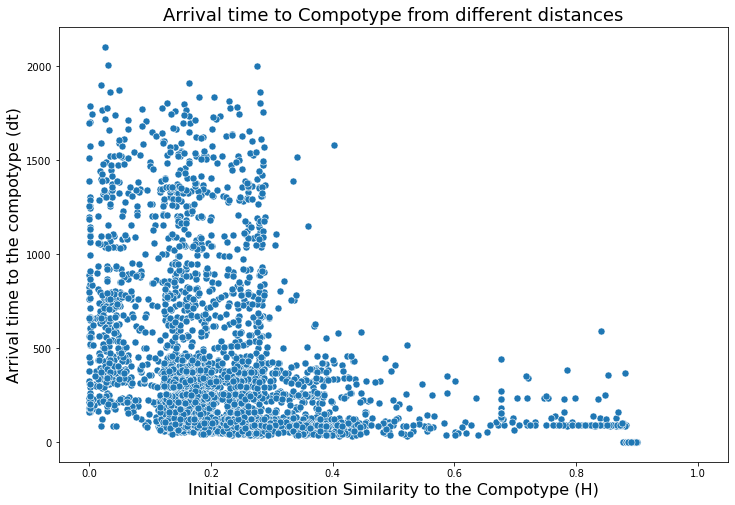

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(H_at_start_list,time_for_compotype_list,s=50)
plt.title("Arrival time to Compotype from different distances", fontsize=18)
plt.xlabel("Initial Composition Similarity to the Compotype (H)", fontsize=16)
plt.xlim(-0.05,1.05)
plt.ylabel("Arrival time to the compotype (dt)", fontsize=16)
# plt.yticks(np.arange(min(accumulated_betas_with_closure_counts_list), max(accumulated_betas_with_closure_counts_list)+1, 10.0))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-22-3f36ade726c1>:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(-0.05,1.05)


Text(0, 0.5, 'Arrival time to the compotype (dt)')

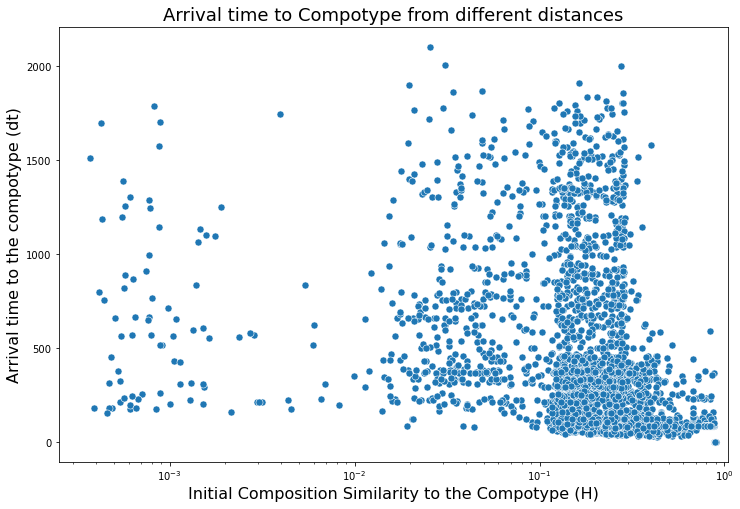

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(H_at_start_list,time_for_compotype_list,s=50)
ax.set_xscale('log')
plt.title("Arrival time to Compotype from different distances", fontsize=18)
plt.xlabel("Initial Composition Similarity to the Compotype (H)", fontsize=16)
plt.xlim(-0.05,1.05)
plt.ylabel("Arrival time to the compotype (dt)", fontsize=16)
# plt.yticks(np.arange(min(accumulated_betas_with_closure_counts_list), max(accumulated_betas_with_closure_counts_list)+1, 10.0))

In [23]:
# how_many_bins = 30
# bin_size = round(len(H_at_start_list) / how_many_bins)
# zipped_lists = zip(H_at_start_list,time_for_compotype_list)
# zipped_lists_sorted = sorted(zipped_lists)
# H_at_start_list_sorted = sorted(H_at_start_list)
# time_for_compotype_list_sorted_by_H = [b for a,b in zipped_lists_sorted]

# H_at_start_binned_list_means = []
# H_at_start_binned_list_std = []
# time_for_compotype_binned_list_means = []
# time_for_compotype_binned_list_sem = []
# for bin_id in range(how_many_bins):
#     relevant_H = H_at_start_list_sorted[(bin_id*bin_size):(bin_id*bin_size)+bin_size]
#     relevant_H_mean = np.mean(relevant_H)
#     H_at_start_binned_list_means.append(relevant_H_mean)
#     relevant_H_std = np.std(relevant_H)
#     H_at_start_binned_list_std.append(relevant_H_std)
#     relevant_compt_time = time_for_compotype_list_sorted_by_H[(bin_id*bin_size):(bin_id*bin_size)+bin_size]
#     relevant_compt_time_mean = np.mean(relevant_compt_time)
#     time_for_compotype_binned_list_means.append(relevant_compt_time_mean)
#     relevant_compt_time_std = np.std(relevant_compt_time)
#     time_for_compotype_binned_list_sem.append(relevant_compt_time_std)

In [24]:
how_many_bins = 30
bins = np.linspace(0,0.9,how_many_bins+1)

zipped_lists = zip(H_at_start_list,time_for_compotype_list)
zipped_lists_sorted = sorted(zipped_lists)
H_at_start_list_sorted = sorted(H_at_start_list)
time_for_compotype_list_sorted_by_H = [b for a,b in zipped_lists_sorted]

H_at_start_binned_list_means = []
not_reached_start_H_binned_means = []
time_for_compotype_binned_list_means = []
not_reached_binned_list_means = []
time_for_compotype_binned_list_sem = []
not_reached_binned_list_sem = []
for bin_id in range(how_many_bins):
    bin_base = bins[bin_id]
    bin_ceil = bins[bin_id+1]
    print(bin_base, bin_ceil)
    
    relevant_H = []
    relevant_compt_time = []
    for x,y in zip(H_at_start_list_sorted,time_for_compotype_list_sorted_by_H):
        if x >= bin_base and x < bin_ceil:
#             print(x, bin_base, bin_ceil)
            relevant_H.append(x)
            relevant_compt_time.append(y)
    
    relevant_H_mean = np.mean([bin_base,bin_ceil])
    H_at_start_binned_list_means.append(relevant_H_mean)
    
    
    relevant_compt_time_mean = np.mean(relevant_compt_time)
    time_for_compotype_binned_list_means.append(relevant_compt_time_mean)
    relevant_compt_time_sem = stats.sem(relevant_compt_time)
    time_for_compotype_binned_list_sem.append(relevant_compt_time_sem)
    
    
    relevant_H_not = []
    relevant_compt_time_not = []
    for x,y in zip(not_reached_start_H, not_reached_steps_taken):
        if x >= bin_base and x < bin_ceil:
            relevant_H_not.append(x)
            relevant_compt_time_not.append(y)
    relevant_H_mean = np.mean([bin_base,bin_ceil])
    not_reached_start_H_binned_means.append(relevant_H_mean)
        
    relevant_compt_time_mean = np.mean(relevant_compt_time_not)
    not_reached_binned_list_means.append(relevant_compt_time_mean)
    relevant_compt_time_sem = stats.sem(relevant_compt_time_not)
    not_reached_binned_list_sem.append(relevant_compt_time_sem)

0.0 0.030000000000000002
0.030000000000000002 0.060000000000000005
0.060000000000000005 0.09000000000000001
0.09000000000000001 0.12000000000000001
0.12000000000000001 0.15000000000000002
0.15000000000000002 0.18000000000000002
0.18000000000000002 0.21000000000000002
0.21000000000000002 0.24000000000000002
0.24000000000000002 0.27
0.27 0.30000000000000004
0.30000000000000004 0.33
0.33 0.36000000000000004
0.36000000000000004 0.39
0.39 0.42000000000000004
0.42000000000000004 0.45
0.45 0.48000000000000004
0.48000000000000004 0.51
0.51 0.54
0.54 0.5700000000000001
0.5700000000000001 0.6000000000000001
0.6000000000000001 0.63
0.63 0.66
0.66 0.6900000000000001
0.6900000000000001 0.7200000000000001
0.7200000000000001 0.7500000000000001
0.7500000000000001 0.78
0.78 0.81
0.81 0.8400000000000001
0.8400000000000001 0.8700000000000001
0.8700000000000001 0.9


C:\Users\amitka\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\amitka\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\amitka\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\amitka\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\amitka\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',


Text(0, 0.5, 'Arrival time to the compotype (dt)')

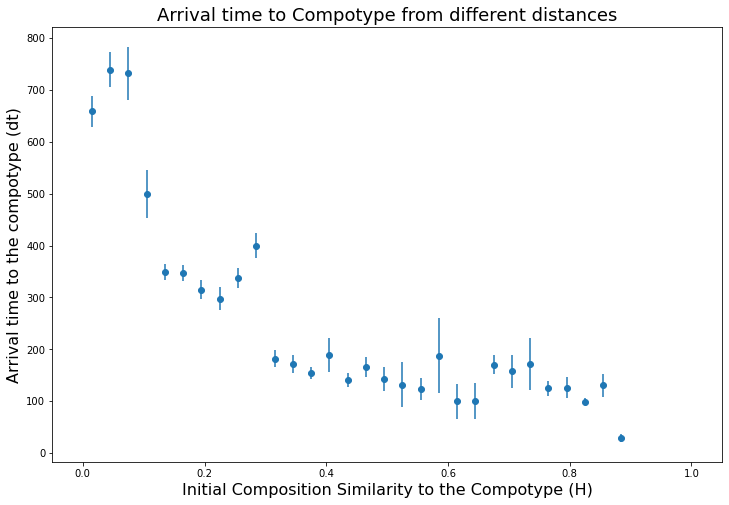

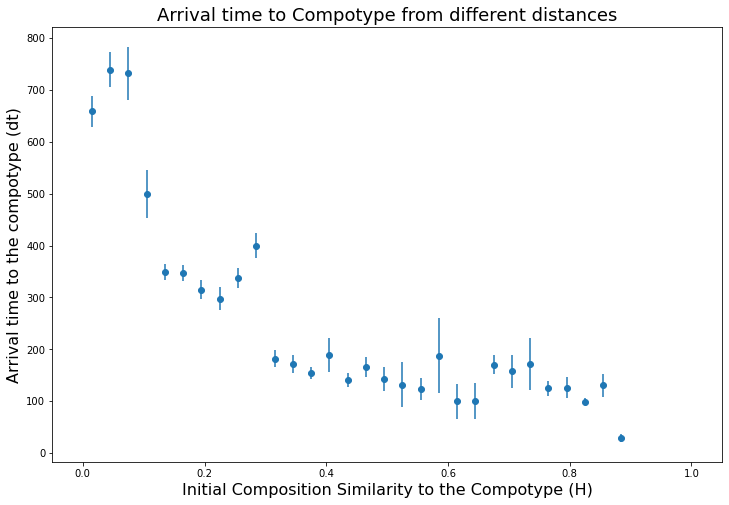

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
plt.errorbar(H_at_start_binned_list_means,time_for_compotype_binned_list_means,
             yerr=time_for_compotype_binned_list_sem, fmt='o')
plt.title("Arrival time to Compotype from different distances", fontsize=18)
plt.xlabel("Initial Composition Similarity to the Compotype (H)", fontsize=16)
plt.xlim(-0.05,1.05)
plt.ylabel("Arrival time to the compotype (dt)", fontsize=16)


fig, ax = plt.subplots(figsize=(12,8))
plt.errorbar(H_at_start_binned_list_means,time_for_compotype_binned_list_means,
             yerr=time_for_compotype_binned_list_sem, fmt='o')
plt.title("Arrival time to Compotype from different distances", fontsize=18)
plt.xlabel("Initial Composition Similarity to the Compotype (H)", fontsize=16)
plt.xlim(-0.05,1.05)
plt.ylabel("Arrival time to the compotype (dt)", fontsize=16)


Text(0, 0.5, 'Arrival time to the compotype (dt)')

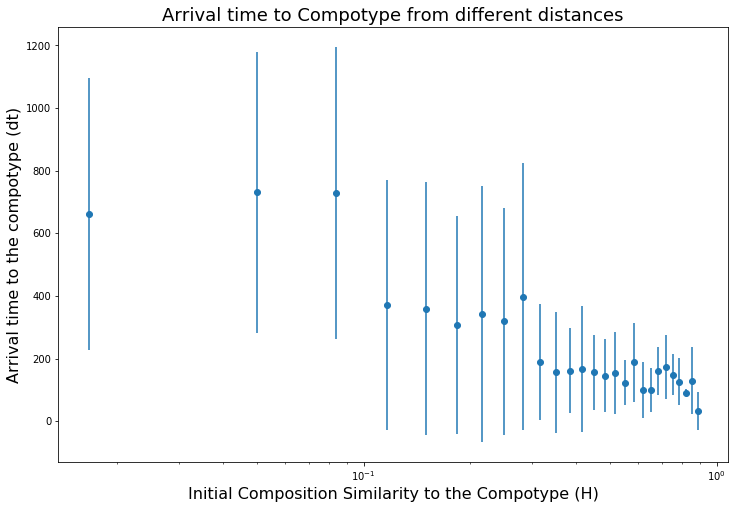

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
plt.errorbar(H_at_start_binned_list_means,time_for_compotype_binned_list_means,
             yerr=time_for_compotype_binned_list_sem, fmt='o')
ax.set_xscale('log')
plt.title("Arrival time to Compotype from different distances", fontsize=18)
plt.xlabel("Initial Composition Similarity to the Compotype (H)", fontsize=16)
# plt.xlim(-10000000,1.05)
plt.ylabel("Arrival time to the compotype (dt)", fontsize=16)

In [35]:
len(H_at_start_list)

4059

In [54]:
arrival_threshold = 0.9

searching_pseudo_compotype = []
H_flux_at_start_list = []
H_flux_at_final_list = []
H_compotype_at_start_list = []
time_for_compotype_list = []
H_not_arrived_in_compotype_at_start_list = []
H_not_arrived_in_compotype_at_final_list = []
for run_id in range(df_all_H_flux_to_compotype.shape[0]):
    if run_id % 250 == 0:
        print(run_id)
    arrived_signal = False
    ceiling_step = 0
    for step in range(df_all_H_flux_to_compotype.shape[1]):
        if step == 0 and df_all_H_flux_to_compotype.iloc[run_id,step] >= arrival_threshold:
            arrived_signal = True
            break
        if df_all_H_flux_to_compotype.iloc[run_id,step] >= arrival_threshold and arrived_signal == False:
            time_for_compotype_list.append(step)
            arrived_signal = True
        if str(df_all_H_flux_to_compotype.iloc[run_id,step]) == str(np.nan):
#             H_compotype_at_start = 
            H_at_start = df_all_H_flux_to_compotype.iloc[run_id,0]
            final_H = df_all_H_flux_to_compotype.iloc[run_id,step-1]
            if final_H > 0.2 and final_H < 0.4:
                df_comp = pd.DataFrame(data['compositions'][0][run_id]).T
                comp_at_final = list(df_comp.iloc[step-1])
                searching_pseudo_compotype.append(comp_at_final)
            if arrived_signal:
                H_flux_at_final_list.append(final_H)
                H_flux_at_start_list.append(H_at_start)
            else:
                H_not_arrived_in_compotype_at_final_list.append(final_H)
                H_not_arrived_in_compotype_at_start_list.append(H_at_start)
            break
    else:
        H_at_start = df_all_H_flux_to_compotype.iloc[run_id,0]
        final_H = df_all_H_flux_to_compotype.iloc[run_id,step-1]
        if arrived_signal:
            H_flux_at_final_list.append(final_H)
            H_flux_at_start_list.append(H_at_start)
        else:
            H_not_arrived_in_compotype_at_final_list.append(final_H)
            H_not_arrived_in_compotype_at_start_list.append(H_at_start)

0
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750


In [55]:
len(searching_pseudo_compotype)

35

In [56]:
h_comps_list = []
combs = combinations(searching_pseudo_compotype,2)
similar_comps = []
for comb in combs:
#     print(comb[0])
    h_comps = 1 - spatial.distance.cosine(comb[0], comb[1])
    h_comps_list.append(h_comps)
    if h_comps >= 0.9:
        if comb[0] not in similar_comps:
            similar_comps.append(comb[0])
        if comb[1] not in similar_comps:
            similar_comps.append(comb[1])


h_comps_list2 = []
couples_indices = []
cohesive_signal = False
while cohesive_signal == False:
#     print(cohesive_signal)
    indices_list = [[] for a in similar_comps]
    for comp1_counter, comp1 in enumerate(similar_comps):
        for comp2_counter, comp2 in enumerate(similar_comps):
            if comp1_counter == comp2_counter:
                continue
            h_comps = 1 - spatial.distance.cosine(comp1, comp2)
            if h_comps < 0.9:
#                 print(h_comps)
                indices_list[comp1_counter].append(comp2_counter)
                indices_list[comp2_counter].append(comp1_counter)
    test_list = [1 for a in indices_list if a != []]
    if test_list == []:
#         print('a')
        cohesive_signal = True
    else:
        lengths = [len(a) for a in indices_list]
        index_max = np.argmax(lengths)
        similar_comps.pop(index_max)
print(len(similar_comps))        

    
similar_comps2 = []                
for g in similar_comps:
    if g not in similar_comps2:
        similar_comps2.append(g)
print(len(similar_comps2))


avg_comp = []
for element in range(len(similar_comps2[0])):
    element_list = []
    for comp in similar_comps2:
        element_list.append(comp[element])
    avg = np.mean(element_list)
    avg_comp.append(avg)
print(sum(avg_comp))
print(avg_comp)

16
16
100.0
[0.0, 0.0, 8.8125, 0.0, 0.0625, 0.125, 0.0625, 0.3125, 0.0625, 0.125, 0.0625, 0.1875, 0.0, 0.25, 0.0, 0.0625, 0.0625, 0.0, 0.0625, 0.0625, 0.0625, 0.125, 0.0625, 0.0625, 0.0, 0.0625, 0.125, 0.0, 0.125, 0.125, 1.5, 0.0, 0.0625, 0.0, 0.0625, 0.0625, 0.0625, 0.0, 0.4375, 0.1875, 0.0625, 0.0, 0.0625, 1.125, 0.0, 0.0625, 0.125, 0.0, 0.125, 1.0, 0.0, 0.0625, 0.6875, 0.25, 0.3125, 0.25, 0.0625, 0.1875, 0.125, 0.0, 0.9375, 0.0625, 0.25, 0.0, 0.1875, 0.125, 36.5625, 0.0625, 0.0, 0.0, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 7.5, 0.25, 0.0625, 0.375, 0.6875, 0.0, 2.1875, 0.0625, 0.5625, 0.0, 0.5, 2.125, 20.0625, 0.25, 0.3125, 1.0, 0.4375, 0.0625, 0.0625, 2.4375, 0.375, 0.25, 0.125, 3.875, 0.0]


In [57]:
df_all_H_flux_to_compotype

,0,1,2,3,4,5,6,7,8,9,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,0.262763,0.262761,0.264529,0.264697,0.266448,0.266473,0.268216,0.268237,0.269963,0.269933,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.285894,0.284599,0.284523,0.283105,0.284523,0.284428,0.285729,0.285627,0.286804,0.286682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.290155,0.289358,0.289200,0.288214,0.289200,0.288214,0.289200,0.288214,0.289200,0.289072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.287545,0.286520,0.286266,0.285102,0.286266,0.285102,0.286266,0.285102,0.286266,0.286159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.126715,0.127737,0.126715,0.127737,0.126715,0.126559,0.126695,0.126497,0.125373,0.125478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.367013,0.367542,0.370956,0.371036,0.374374,0.374742,0.377999,0.378237,0.381400,0.381321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,0.314588,0.314742,0.317222,0.317216,0.319658,0.319965,0.322364,0.322569,0.324912,0.324820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,0.721531,0.721908,0.722477,0.722858,0.723969,0.721868,0.722003,0.720626,0.720657,0.720706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,0.575974,0.576103,0.572955,0.573192,0.572335,0.568395,0.568454,0.568194,0.567825,0.566942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Arrival time to the compotype (dt)')

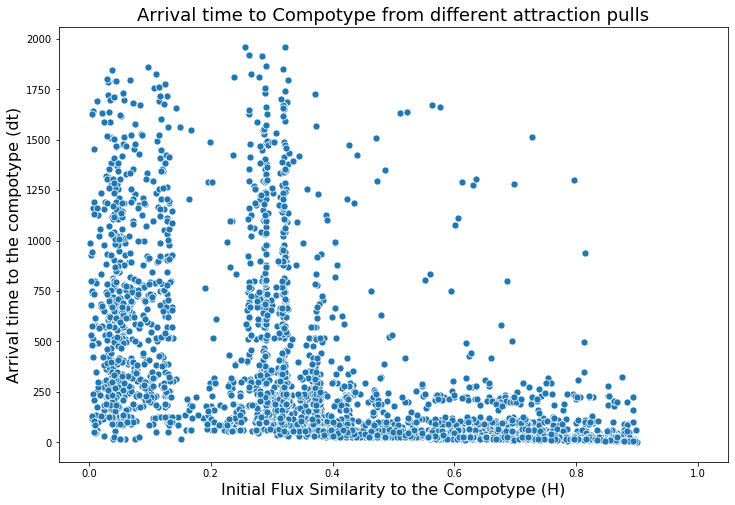

In [59]:
plt.figure(figsize=(12,8))
sns.scatterplot(H_flux_at_start_list,time_for_compotype_list,s=50)
plt.title("Arrival time to Compotype from different attraction pulls", fontsize=18)
plt.xlabel("Initial Flux Similarity to the Compotype (H)", fontsize=16)
plt.xlim(-0.05,1.05)
plt.ylabel("Arrival time to the compotype (dt)", fontsize=16)
# plt.yticks(np.arange(min(accumulated_betas_with_closure_counts_list), max(accumulated_betas_with_closure_counts_list)+1, 10.0))

In [60]:
len(time_for_compotype_list)

4729

In [61]:
len(H_flux_at_start_list)

4729

C:\Users\amitka\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  


Text(0, 0.5, 'Arrival time to the compotype (dt)')

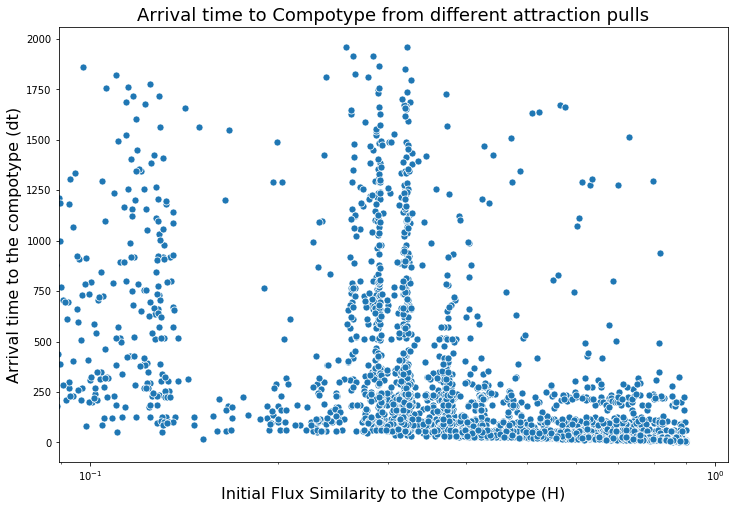

In [62]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(H_flux_at_start_list,time_for_compotype_list,s=50)
ax.set_xscale('log')
plt.title("Arrival time to Compotype from different attraction pulls", fontsize=18)
plt.xlabel("Initial Flux Similarity to the Compotype (H)", fontsize=16)
plt.xlim(-0.05,1.05)
plt.ylabel("Arrival time to the compotype (dt)", fontsize=16)
# plt.yticks(np.arange(min(accumulated_betas_with_closure_counts_list), max(accumulated_betas_with_closure_counts_list)+1, 10.0))

In [66]:
how_many_bins = 30
bin_size = round(len(H_flux_at_start_list) / how_many_bins)
zipped_lists = zip(H_flux_at_start_list,time_for_compotype_list)
zipped_lists_sorted = sorted(zipped_lists)
H_flux_at_start_list_sorted = sorted(H_flux_at_start_list)
time_for_compotype_flux_list_sorted_by_H = [b for a,b in zipped_lists_sorted]

H_flux_at_start_binned_list_means = []
H_flux_at_start_binned_list_std = []
time_for_compotype_flux_binned_list_means = []
time_for_compotype_flux_binned_list_std = []
for bin_id in range(how_many_bins):
    relevant_H = H_flux_at_start_list_sorted[(bin_id*bin_size):(bin_id*bin_size)+bin_size]
    relevant_H_mean = np.mean(relevant_H)
    H_flux_at_start_binned_list_means.append(relevant_H_mean)
    relevant_H_std = np.std(relevant_H)
    H_flux_at_start_binned_list_std.append(relevant_H_std)
    relevant_compt_time = time_for_compotype_flux_list_sorted_by_H[(bin_id*bin_size):(bin_id*bin_size)+bin_size]
    relevant_compt_time_mean = np.mean(relevant_compt_time)
    time_for_compotype_flux_binned_list_means.append(relevant_compt_time_mean)
    relevant_compt_time_std = np.std(relevant_compt_time)
    time_for_compotype_flux_binned_list_std.append(relevant_compt_time_std)

In [64]:
# how_many_bins = 30
# bin_size = np.linspace(0,1,how_many_bins+1)

# zipped_lists = zip(H_flux_at_start_list,time_for_compotype_list)
# zipped_lists_sorted = sorted(zipped_lists)
# H_flux_at_start_list_sorted = sorted(H_flux_at_start_list)
# time_for_compotype_flux_list_sorted_by_H = [b for a,b in zipped_lists_sorted]

# H_flux_at_start_binned_list_means = []
# H_flux_at_start_binned_list_std = []
# time_for_compotype_flux_binned_list_means = []
# time_for_compotype_flux_binned_list_std = []
# for bin_id in range(how_many_bins):
#     relevant_H = H_flux_at_start_list_sorted[(bin_id*bin_size):(bin_id*bin_size)+bin_size]
#     relevant_H_mean = np.mean(relevant_H)
#     H_flux_at_start_binned_list_means.append(relevant_H_mean)
#     relevant_H_std = np.std(relevant_H)
#     H_flux_at_start_binned_list_std.append(relevant_H_std)
#     relevant_compt_time = time_for_compotype_flux_list_sorted_by_H[(bin_id*bin_size):(bin_id*bin_size)+bin_size]
#     relevant_compt_time_mean = np.mean(relevant_compt_time)
#     time_for_compotype_flux_binned_list_means.append(relevant_compt_time_mean)
#     relevant_compt_time_std = np.std(relevant_compt_time)
#     time_for_compotype_flux_binned_list_std.append(relevant_compt_time_std)

TypeError: only integer scalar arrays can be converted to a scalar index

Text(0, 0.5, 'Arrival time to the compotype (dt)')

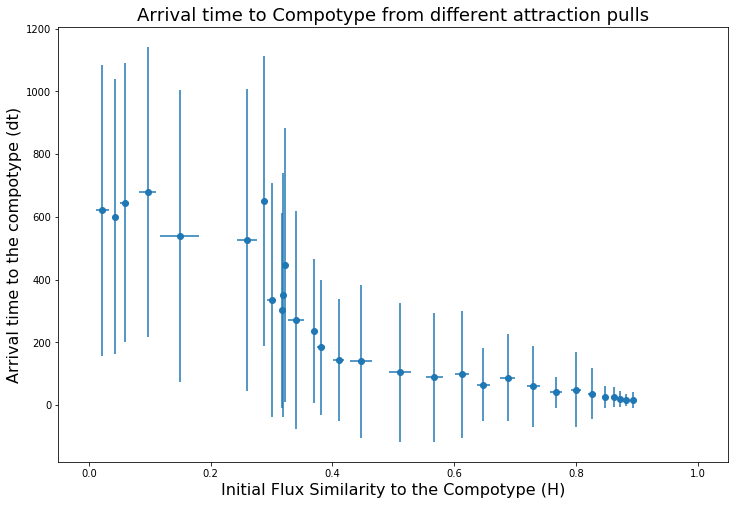

In [67]:
fig, ax = plt.subplots(figsize=(12,8))
plt.errorbar(H_flux_at_start_binned_list_means,time_for_compotype_flux_binned_list_means,
             yerr=time_for_compotype_flux_binned_list_std, xerr=H_flux_at_start_binned_list_std, fmt='o')
plt.title("Arrival time to Compotype from different attraction pulls", fontsize=18)
plt.xlabel("Initial Flux Similarity to the Compotype (H)", fontsize=16)
plt.xlim(-0.05,1.05)
plt.ylabel("Arrival time to the compotype (dt)", fontsize=16)

Text(0, 0.5, 'Arrival time to the compotype (dt)')

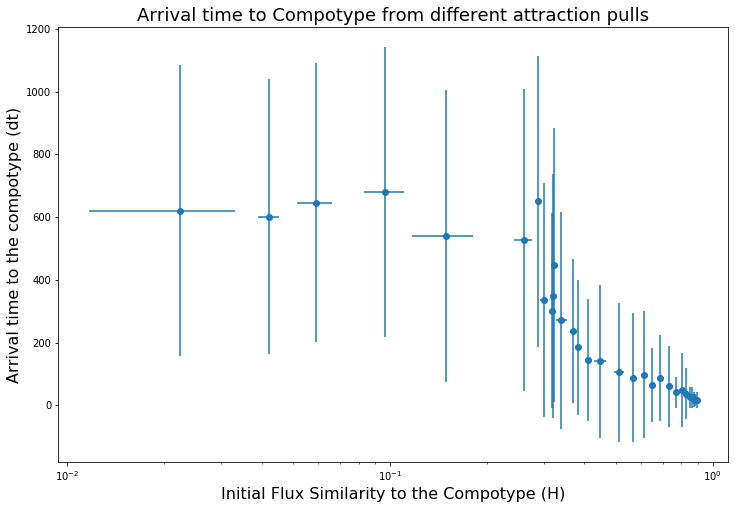

In [68]:
fig, ax = plt.subplots(figsize=(12,8))
plt.errorbar(H_flux_at_start_binned_list_means,time_for_compotype_flux_binned_list_means,
             yerr=time_for_compotype_flux_binned_list_std, xerr=H_flux_at_start_binned_list_std, fmt='o')
ax.set_xscale('log')
plt.title("Arrival time to Compotype from different attraction pulls", fontsize=18)
plt.xlabel("Initial Flux Similarity to the Compotype (H)", fontsize=16)
# plt.xlim(-10000000,1.05)
plt.ylabel("Arrival time to the compotype (dt)", fontsize=16)

Text(0, 0.5, 'Initial Flux Similarity to the Compotype (H)')

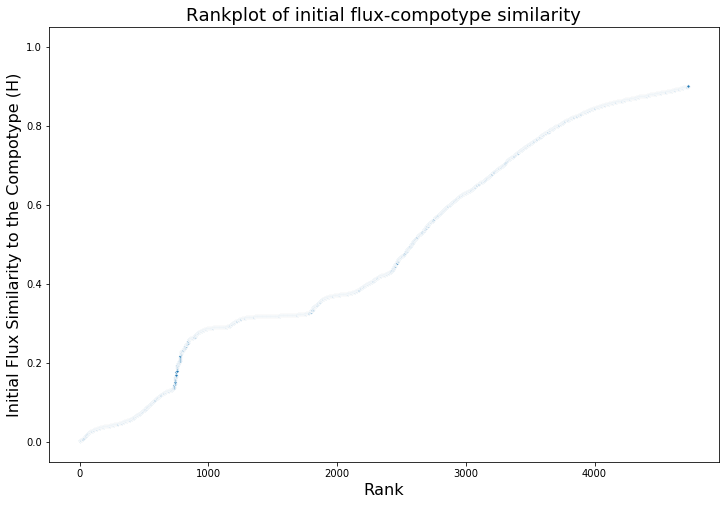

In [69]:
'''Rankplot of flux-compotype H'''
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(range(len(H_flux_at_start_list)),sorted(H_flux_at_start_list),s=10)
# sns.scatterplot(H_flux_at_start_list,time_for_compotype_list,s=50)
# ax.set_yscale('log')
plt.title("Rankplot of initial flux-compotype similarity", fontsize=18)
plt.xlabel("Rank", fontsize=16)
plt.ylim(-0.05,1.05)
plt.ylabel("Initial Flux Similarity to the Compotype (H)", fontsize=16)
# plt.yticks(np.arange(min(accumulated_betas_with_closure_counts_list), max(accumulated_betas_with_closure_counts_list)+1, 10.0))

In [70]:
len(H_flux_at_start_list)

4729

Text(0, 0.5, 'Final Flux Similarity to the Compotype (H)')

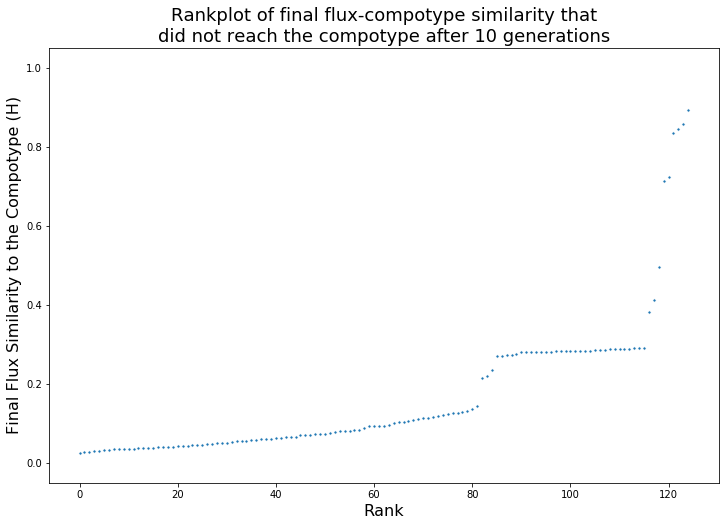

In [71]:
'''Rankplot of flux-compotype H'''
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(range(len(H_not_arrived_in_compotype_at_final_list)),sorted(H_not_arrived_in_compotype_at_final_list),s=10)
# ax.set_yscale('log')
plt.title("Rankplot of final flux-compotype similarity that\ndid not reach the compotype after 10 generations", fontsize=18)
plt.xlabel("Rank", fontsize=16)
plt.ylim(-0.05,1.05)
plt.ylabel("Final Flux Similarity to the Compotype (H)", fontsize=16)

(-0.05, 1.05)

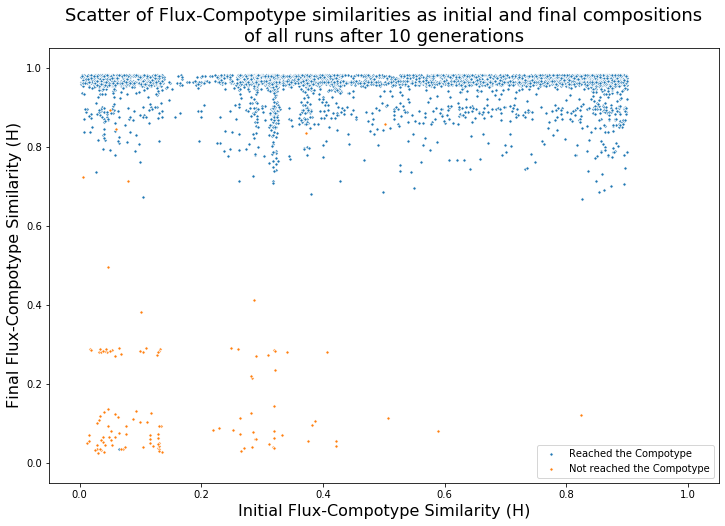

In [72]:
'''Scatter of initial H and final H of flux-compotype similarity'''
choose_mode = 'together'   # could be 'reahced', 'not reached' and 'together'
start_array = []
final_array = []
if choose_mode == 'reached' or choose_mode == 'together':
    start_array_reached = H_flux_at_start_list
    final_array_reached = H_flux_at_final_list
    title = "Scatter of Flux-Compotype similarities as initial and final compositions\nof runs that reached the compotype within 10 generations"
if choose_mode == 'not reached' or choose_mode == 'together':
    start_array_not_reached = H_not_arrived_in_compotype_at_start_list
    final_array_not_reached = H_not_arrived_in_compotype_at_final_list
    title = "Scatter of Flux-Compotype similarities as initial and final compositions\nof runs that did not reach the compotype within 10 generations"
if choose_mode == 'together':
    title = "Scatter of Flux-Compotype similarities as initial and final compositions\nof all runs after 10 generations"
if choose_mode != 'reached' and choose_mode != 'not reached' and choose_mode != 'together':
    print("The mode wasn;t chosen correctly!!")


fig, ax = plt.subplots(figsize=(12,8))
if choose_mode == 'reached' or choose_mode == 'together':
    sns.scatterplot(start_array_reached,final_array_reached,s=10,label='Reached the Compotype')
if choose_mode == 'not reached' or choose_mode == 'together':
    sns.scatterplot(start_array_not_reached,final_array_not_reached,s=10,label='Not reached the Compotype')
# ax.set_yscale('log')
plt.title(title, fontsize=18)
plt.xlabel("Initial Flux-Compotype Similarity (H)", fontsize=16)
plt.xlim(-0.05,1.05)
plt.ylabel("Final Flux-Compotype Similarity (H)", fontsize=16)
plt.ylim(-0.05,1.05)